## Import Libraries

In [2]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.ndimage as ndi
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.stats import mad_std
from photutils.segmentation import detect_sources, SourceCatalog
from photutils.background import Background2D, MedianBackground
import statmorph
from statmorph.utils.image_diagnostics import make_figure

## Import data

In [3]:
path='Savary_training_set_lenses/'
lensed='Lens_simulations/'
non_lensed='LRG_only/'
lensed_source='lensed_source_only/'
RMS='Lenses/RMS/'
PSF='Lenses/PSF/'

files_lensed=os.listdir(path+lensed)
files_non_lensed=os.listdir(path+non_lensed)
files_lensed_source=os.listdir(path+lensed_source)
files_rms=os.listdir(path+RMS)
files_psf=os.listdir(path+PSF)

In [4]:
files=[file for file in files_lensed if (file in files_non_lensed and file in files_lensed_source and file in files_rms and file in files_psf)] #Only take files with all needed files (RMS, PSF, Lens, lensed source, non lensed)

## Data visualisation
We visualise the 9 first images of the set as example

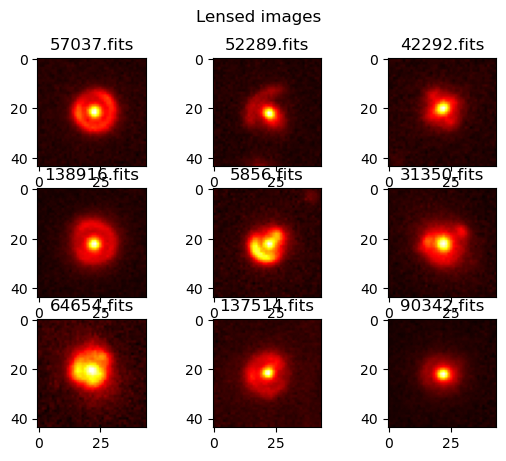

In [5]:
# plot of 9 first lensed images
for count, file in zip(range(1,10),files[:9]):
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file)
    plt.imshow(image, cmap='hot')
plt.show()

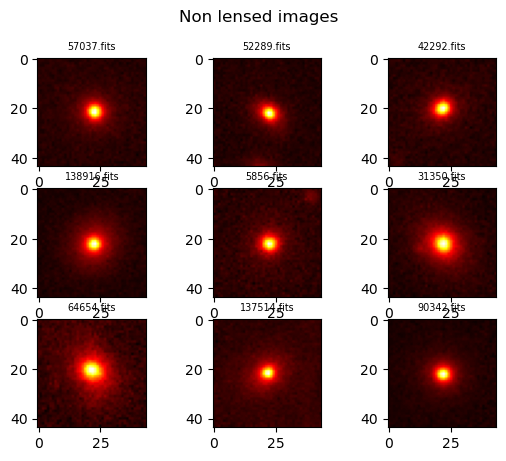

In [6]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('Non lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

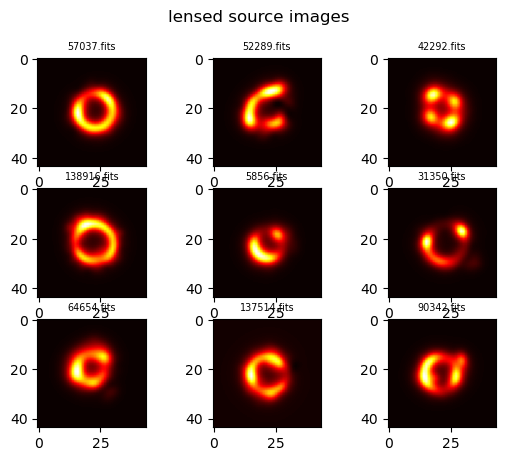

In [7]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+lensed_source+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('lensed source images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

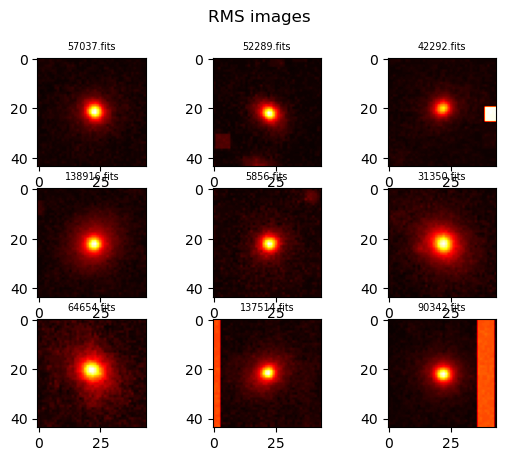

In [8]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+RMS+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('RMS images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

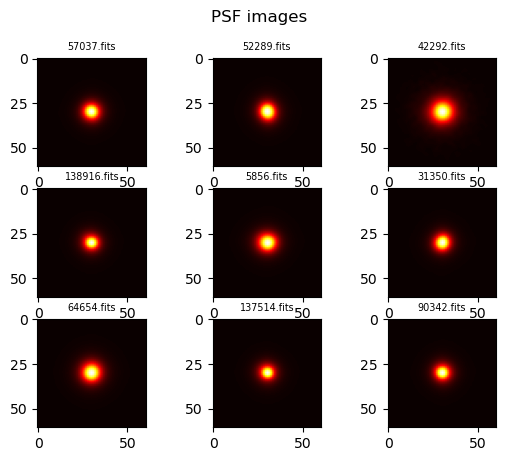

In [9]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+PSF+file
    image, header = fits.getdata(file_path, header=True)
    plt.suptitle('PSF images')
    plt.subplot(330+count)
    plt.title(file, fontsize='x-small')
    plt.imshow(image, cmap='hot')
plt.show()

## Source detection
We will detect sources and select the right segmentation mask

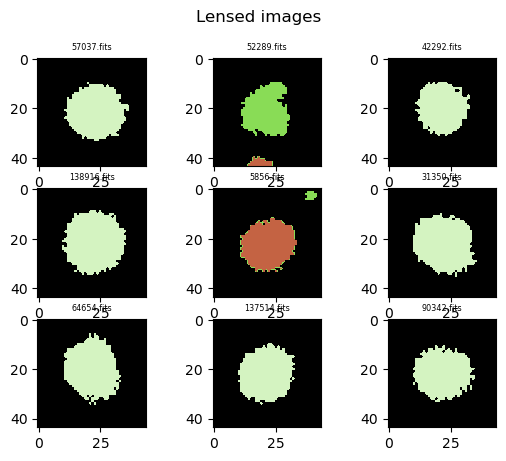

In [10]:
for count, file in zip(range(1,10),files[:9]):
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='xx-small')
    plt.imshow(segm.data, cmap=segm.cmap)
plt.show()

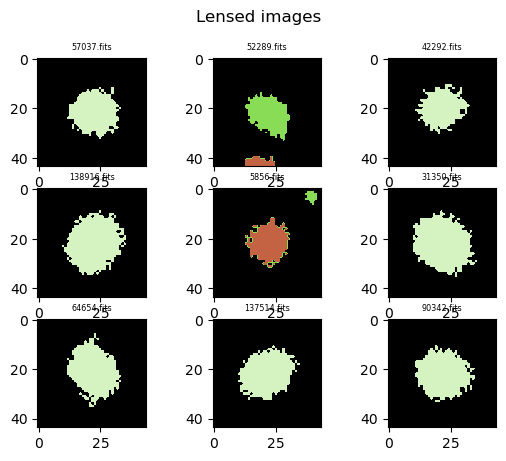

In [11]:
for count, file in zip(range(1,10),files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    plt.suptitle('Lensed images')
    plt.subplot(330+count)
    plt.title(file, fontsize='xx-small')
    plt.imshow(segm.data, cmap=segm.cmap)
plt.show()

### Now we detect the main source

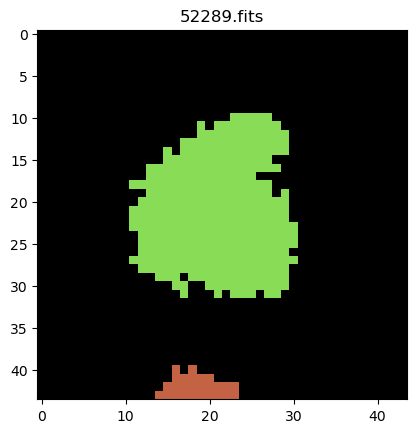

In [12]:
file=files[1]
file_path=path+lensed+file
image, header = fits.getdata(file_path, header=True)
std = mad_std(image)
threshold=2.5*std
segm = detect_sources(image, threshold, npixels=5)
plt.title(file)
plt.imshow(segm.data, cmap=segm.cmap)
plt.show()

In [13]:
def galaxy_map(segm):
    label = np.argmax(segm.areas)+1
    segm_map=1*(segm.data==label)
    return segm_map

def galaxy_label(segm):
    label = np.argmax(segm.areas)+1
    return label

def mask(segm):
    galaxy=(galaxy_map(segm))
    segm_map=segm.data!=0
    mask=segm_map-galaxy
    bool_mask=mask==1
    return bool_mask

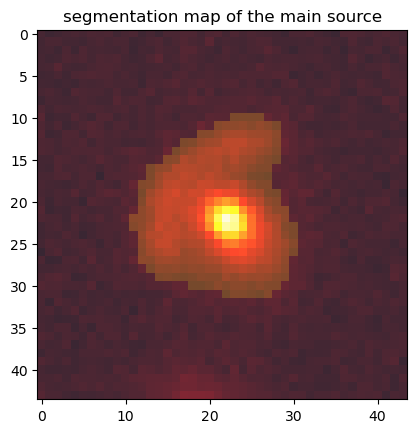

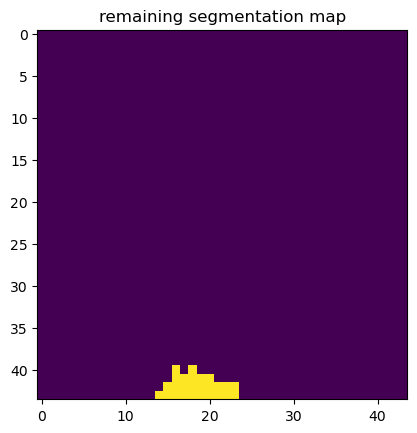

In [14]:
segm_map=galaxy_map(segm)

segmap_float = ndi.uniform_filter(np.float64(segm_map), size=5)
segm_map = segmap_float > 0.5

Mask=mask(segm)

plt.imshow(segm_map, alpha=0.5)
plt.imshow(image, alpha=0.7, cmap='hot')
plt.title('segmentation map of the main source')
plt.show()
plt.imshow(Mask)
plt.title('remaining segmentation map')
plt.show()

## Study on the RMS and its link to the data

In [15]:
def high_pass(x,y,cut):
    args=np.where(x>=cut)
    return(x[args],y[args])

def f(x,a,b):
    return(a*x+b)

a=0.020022051438563258, computed gain=49.94493211989061, b=5.260813531709831
gain of the header=52.5017432309

a=0.021169011165188545, computed gain=47.238862136576955, b=3.6364124232716994
gain of the header=47.37612528999

a=0.021212145763784794, computed gain=47.14280257810062, b=6.540438300153897
gain of the header=46.94637051385

a=0.02380611502899188, computed gain=42.006013949868205, b=5.405077422312915
gain of the header=41.94063253633

a=0.013536607323622607, computed gain=73.87375404285454, b=3.599179856173533
gain of the header=72.92746045316

a=0.02264997900067922, computed gain=44.1501513078671, b=4.75467495691774
gain of the header=44.00764948075

a=0.01863693965568038, computed gain=53.656878139604245, b=4.526348338613143
gain of the header=53.36918721413

a=0.027570262601052116, computed gain=36.27096391754494, b=4.94791083304661
gain of the header=36.3305506692

a=0.0263158741052002, computed gain=37.99987779248393, b=4.777581378879477
gain of the header=38.02922533227

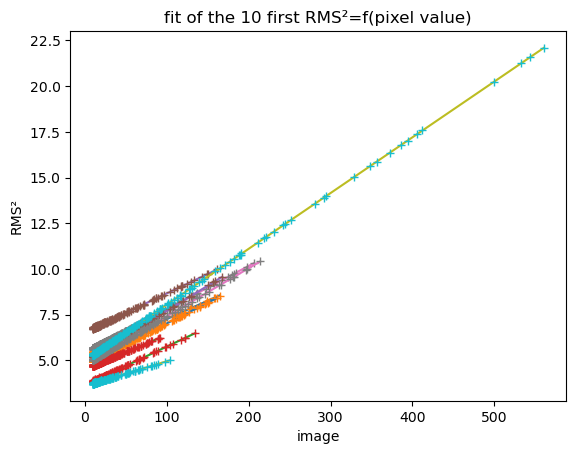

In [16]:
b,gain=[],[]
for file in files[:10]:
    file_path=path+non_lensed+file
    rms_path=path+RMS+file
    image, header = fits.getdata(file_path, header=True)
    rms,rms_header= fits.getdata(rms_path, header=True)
    image=np.ravel(image)
    rms=np.ravel(rms)
    
    clean=high_pass(image,rms**2,10)
    
    #popt,pcov=curve_fit(f,image,rms**2)
    popt,pcov=curve_fit(f,*clean)
    print(f'a={popt[0]}, computed gain={1/popt[0]}, b={popt[1]}')
    gain_rms=rms_header['gain']
    gain_image=header['GAIN']
    print(f'gain of the header={gain_image}\n')
    
    b.append(popt[1])
    gain.append(gain_image)
    
    x=np.linspace(np.min(clean[0]),np.max(clean[0]),100)
    y=f(x,*popt)
    
    plt.plot(x,y)
    
    plt.plot(*clean,'+')
    plt.xlabel('image')
    plt.ylabel('RMS²')
plt.title('fit of the 10 first RMS²=f(pixel value)')
plt.show()


### Cross test: do we get the gain by doing pixel_value/RMS

true gain=52.5017432309, computed gain=1.0372013018118311

[0.56279021 0.49083559 0.81021621 ... 0.04115814 0.49397961 0.47056638] 

true gain=47.37612528999, computed gain=0.8925030861646075

[-0.06919242 -0.81560036 -0.46384106 ... -0.7403532   0.18117267
  0.11301979] 

true gain=46.94637051385, computed gain=0.7818659007720462

[ 0.02361272 -0.19160622  0.10115872 ... -0.00816966 -0.23514641
 -0.31282212] 

true gain=41.94063253633, computed gain=1.7496160119100843

[ 0.28100346  0.33360135  0.36975874 ...  0.10232227 -0.43980733
 -0.01229115] 

true gain=72.92746045316, computed gain=1.0099632238310028

[ 0.07992791  0.6202743  -0.60601587 ...  0.07091347  0.08965135
 -1.21030086] 

true gain=44.00764948075, computed gain=2.1285981614228473

[0.3136458  0.75303894 0.37704653 ... 0.34086042 0.86942082 0.90409827] 

true gain=53.36918721413, computed gain=1.4605554043247717

[ 0.09280775  0.1555527  -0.30360132 ...  0.20942407 -0.52082181
  0.24971909] 

true gain=36.3305506692, com

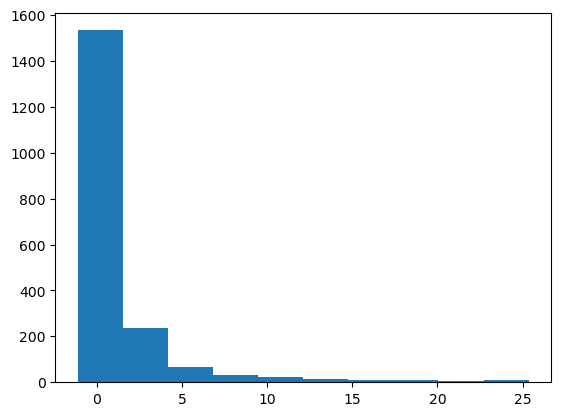

25.35871561954721


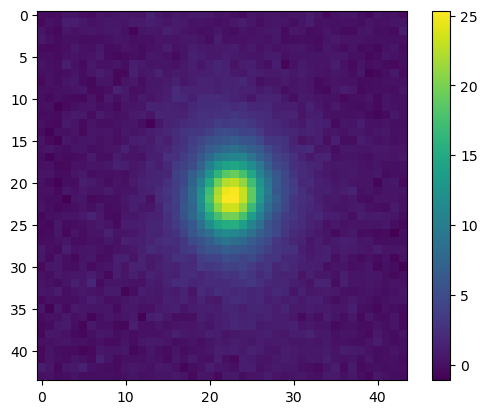

In [17]:
true_gain,computed_gain=[],[]

for file in files[:10]:
    file_path=path+non_lensed+file
    rms_path=path+RMS+file
    image, header = fits.getdata(file_path, header=True)
    rms,rms_header= fits.getdata(rms_path, header=True)
    image1=np.ravel(image)
    rms1=np.ravel(rms)
    
    gain=header['GAIN']
    exptime=header['EXPTIME']
        
    true_gain.append(header['GAIN'])
    comp_gain=image1/rms1**2
    #test=comp_gain+np.sqrt(2.3*exptime)
    mean_comp_gain=np.mean(comp_gain)
    #mean_test=np.mean(test)
    computed_gain.append(mean_comp_gain)
    
    print(f'true gain={gain}, computed gain={mean_comp_gain}\n')
    #print(f'test={mean_test}')
    print(comp_gain ,'\n')
plt.hist(comp_gain)
plt.show()
plt.imshow(image/rms**2)
plt.colorbar()
print(np.max(image/rms**2))

Ici on sous estime le gain pour les hautes valeurs car on a pas soustrait le fond de ciel. et pour les petites valeurs on ne calcul pas le gain du tout car I_ADU ~=0.

## Study on the creation of simulated images

Does the lense simulation is the addition of the lens and the lensed source ?

To know it I will substract both the lensed source and the deflector. If the sum of all pixels!= 0, it means that it's not a simple addition

In [18]:
ok_file=0
for file in files:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    source_path=path+lensed_source+file
    source, source_header= fits.getdata(source_path, header=True)
    lrg_path=path+non_lensed+file
    lrg, header_lrg = fits.getdata(lrg_path, header=True)
    
    substracted=image-source-lrg
    pixel_sum=np.sum(substracted)
    if pixel_sum==0:
        ok_file+=1
print(f'{ok_file/len(files)*100}% of the files are source+deflector')

100.0% of the files are source+deflector


## Study on errors

In [19]:
list_segm=[]#we will store segmentation maps

not_bck_sub_error=[]
normal=[]

for file in files[:300]:#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    td = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    psf_path=path+PSF+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    psf,psf_header=fits.getdata(psf_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    #estimation of the background
    #let's take the median estimator
    
    segm_float = ndi.uniform_filter(np.float64(segm.data), size=5)
    segm =1*(segm_float > 0.5)
    
    background=np.where(segm!=0,0,image)

    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    #plt.imshow(image)
    #plt.show()
    #plt.imshow(bkg.background)
    #plt.show()

    image -= bkg.background  # subtract the background
        
    try:
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always")
            source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask,psf=psf)
            morph = source_morphs[0]
            if (len(w)!=0) and (str(w[-1].message)=='Image is not background-subtracted.'):
                not_bck_sub_error.append(file)
            elif len(w)==0:
                normal.append(file)
    except:
        pass

In [20]:
print(len(not_bck_sub_error)/300)

0.06666666666666667


In [21]:
def corner_value(image,len=5):
    dimensions=np.shape(image)
    
    data=image[:len,:len] #up left corner
    data=np.append(data,image[:len,dimensions[0]-len:]) #up right corner
    data=np.append(data,image[dimensions[0]-len:,:len]) #down left corner
    data=np.append(data,image[dimensions[0]-len:,dimensions[1]-len:]) #down right corner
    
    return data

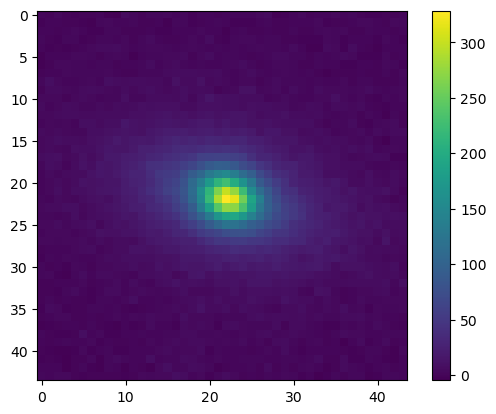

0.90844434


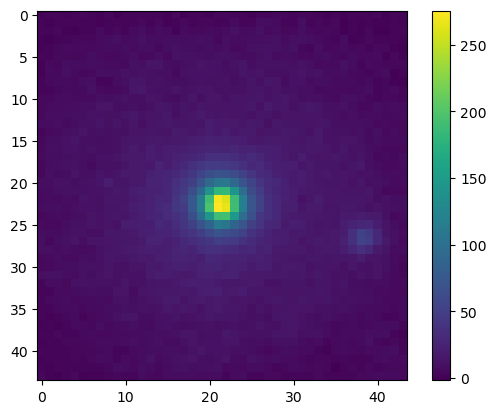

2.9520376


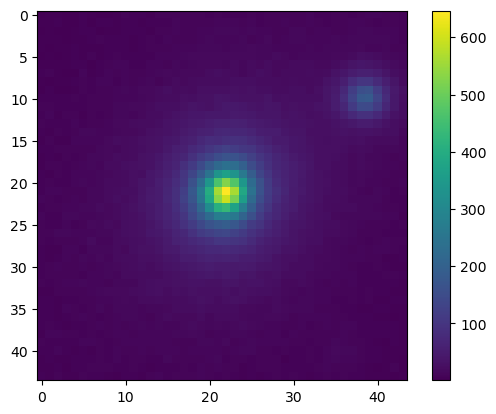

5.6049542


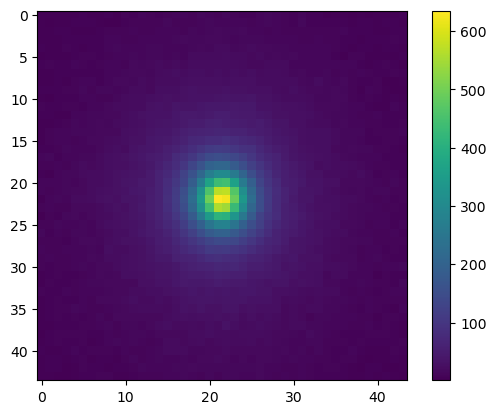

5.7653646


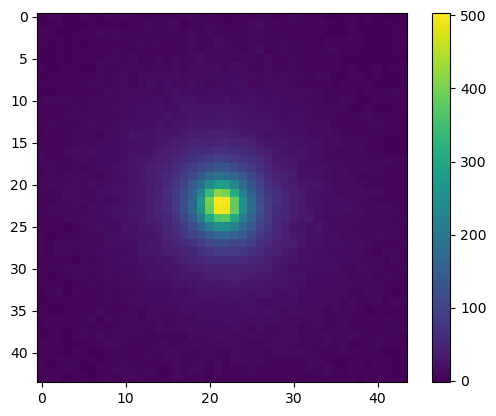

3.464046


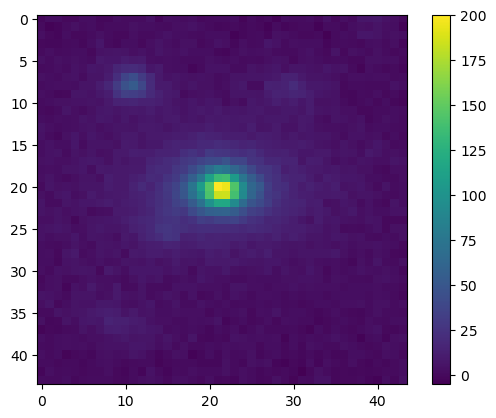

0.95613945


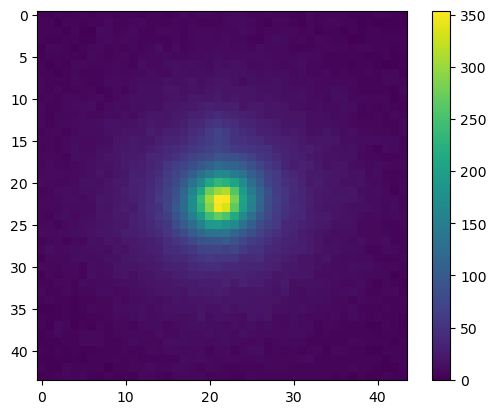

3.7828584


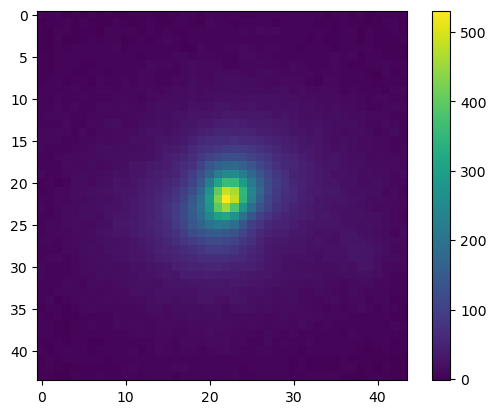

3.23138


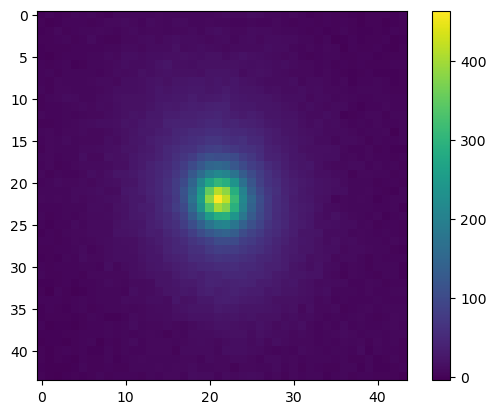

1.7323291


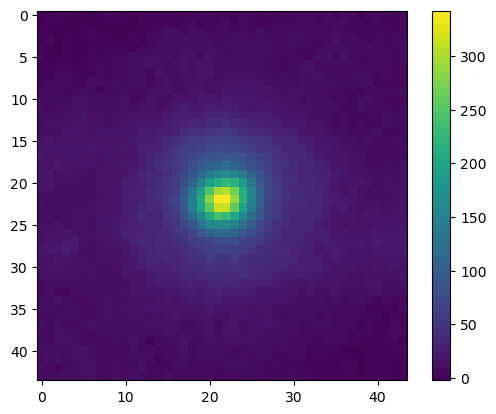

4.592067


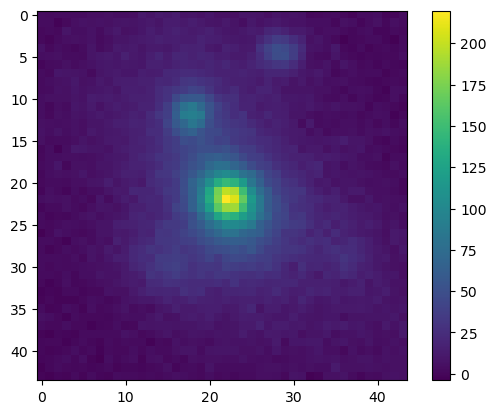

2.9417644


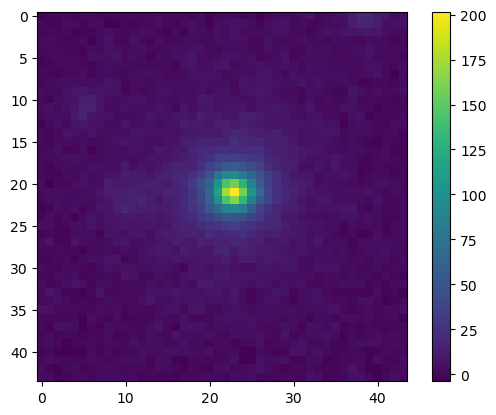

1.472892


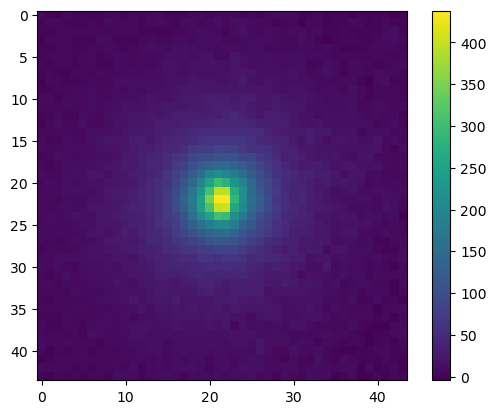

4.1854424


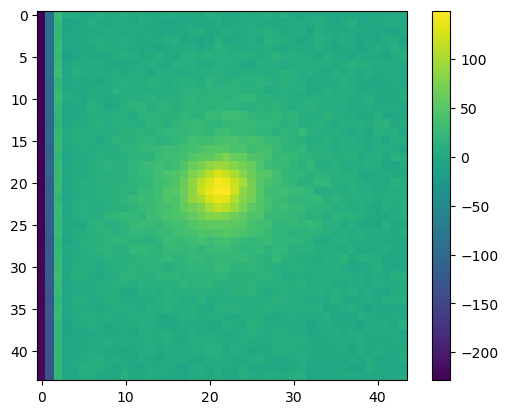

-0.5210838


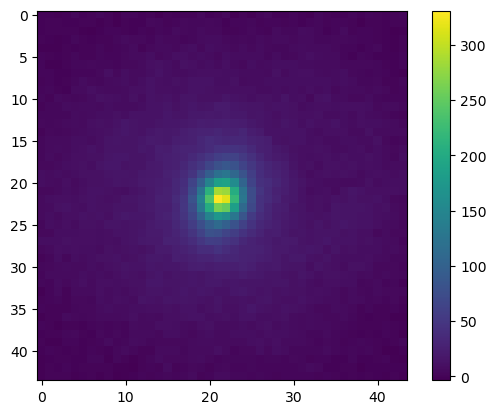

0.38422072


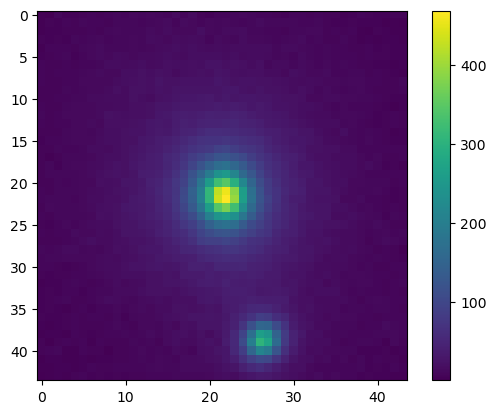

5.2836447


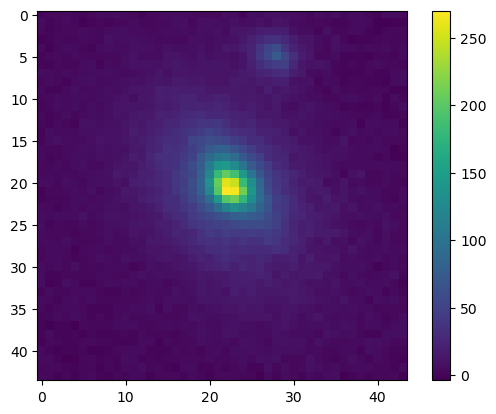

2.255485


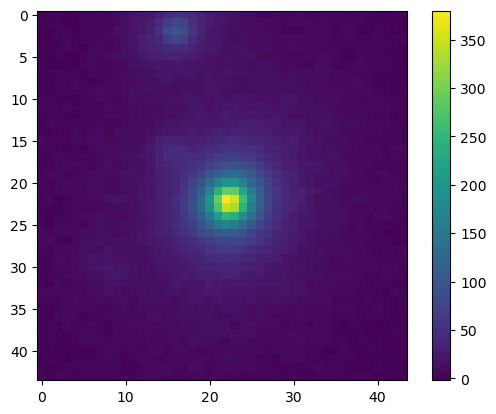

2.6112423


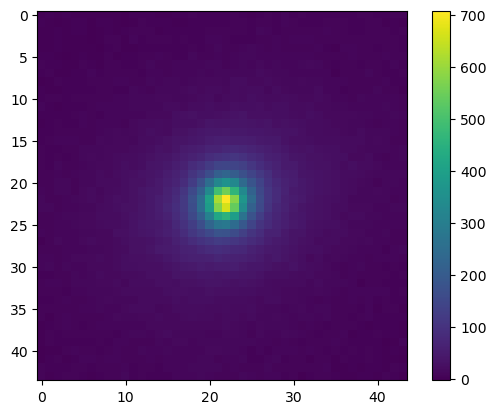

4.3036013


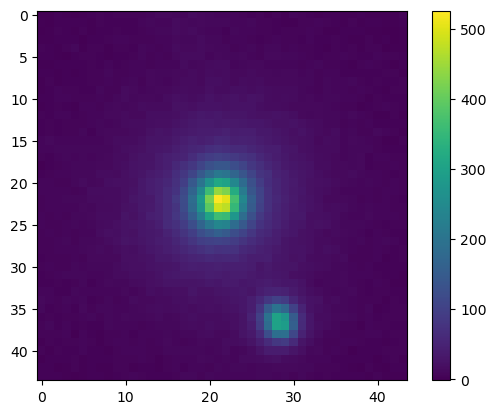

3.2296438


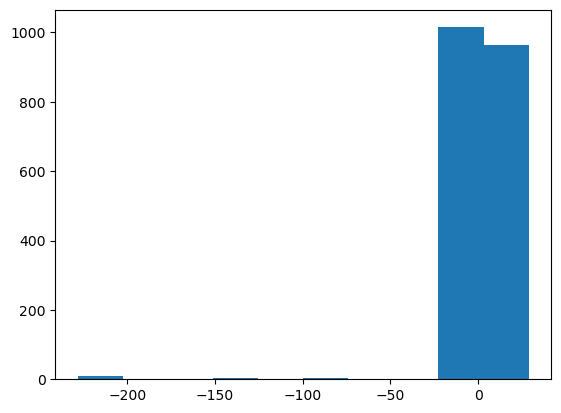

0.41993165
0.082824014
0.6693554
1.2976484
0.5426084
2.0477953
1.134975
2.3044252
0.83562654
0.15612267
0.54363954
1.2420392
1.2772022
-0.11012794
1.6252774
-0.07171215
0.48874545
1.0448878
1.9635785
0.54710436
1.6514547
3.71636
0.4240765
0.33499968
0.41223222
1.1655715
0.56815684
3.1523557
0.17731729
0.29205707
1.5466974
0.065452926
0.92777723
0.5505681
1.2112347
0.7874521
3.302915
-0.1773789
0.52680135
0.61092675
0.9891213
0.0010278851
0.7332692
0.14540681
1.7776426
1.4606954
0.4130321
0.7267412
1.1963392
0.20828807
0.71320975
0.8752436
0.46689203
0.5481513
0.04737812
0.23236868
0.8522403
1.4547298
0.75540155
0.25208452
-0.15419857
0.22707465
0.17196217
1.1337247
0.3194074
2.759039
0.18561798
1.4329522
0.4622075
2.1063294
0.72211325
0.52981526
2.2650309
0.29980224
-0.019976333
1.66042
-0.24775729
1.1346977
0.43618506
0.8998461
0.047534935
-0.39061564
0.26937497
0.48475397
0.56811833
0.751829
0.08919446
0.7274058
1.2581589
1.625445
2.150073
0.35589555
1.2478707
1.6514663
0.67638254
1.

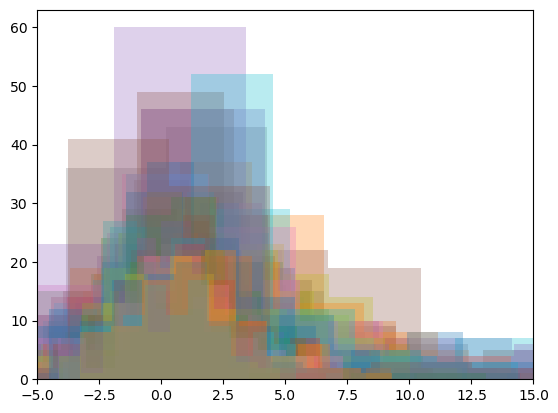

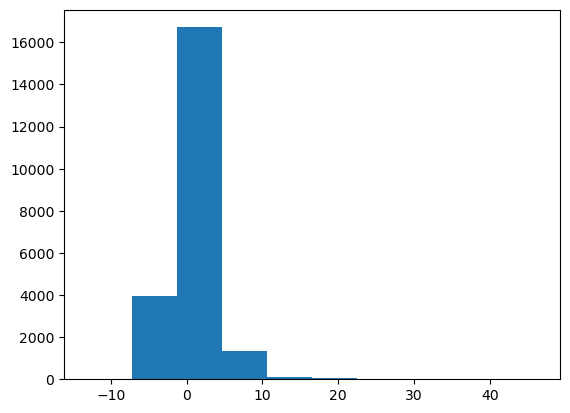

In [22]:
background=[]
for file in not_bck_sub_error:
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    corner=corner_value(image)
    background=np.concatenate((background,corner))
    plt.imshow(image)
    plt.colorbar()
    plt.show()
    #plt.hist(corner, alpha=0.3)
    print(np.median(corner))
#plt.xlim(-5,15)
#plt.show()
plt.hist(background)
plt.show()

background=[]
for file in normal:
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    corner=corner_value(image)
    background=np.concatenate((background,corner))
    plt.hist(corner, alpha=0.3)
    print(np.median(corner))
plt.xlim(-5,15)
plt.show()

plt.hist(background)
plt.show()


## Test with substraction of background median value

57037.fits
flag_sersic=0
flag=0
sersic_amplitude = 123.46579426210057
sersic_rhalf = 5.979822051934606
sersic_n = 0.16345735539969247
sersic_xc = 22.786636601483508
sersic_yc = 21.80159526160605
sersic_ellip = 0.2050656756949604
sersic_theta = 2.808164335170037 



52289.fits
flag_sersic=1
flag=0
sersic_amplitude = 332.1556609128694
sersic_rhalf = 1.8129954086066002
sersic_n = 8.475824636343546
sersic_xc = 22.03962749695698
sersic_yc = 22.19769371075094
sersic_ellip = 0.6735287941032092
sersic_theta = 0.631327041198372 

42292.fits
flag_sersic=0
flag=0
sersic_amplitude = 69.36841147750228
sersic_rhalf = 2.558153084296713
sersic_n = 4.97875727069225
sersic_xc = 21.031957760582607
sersic_yc = 20.01922060082395
sersic_ellip = 0.9129869537294572
sersic_theta = 0.5682101710656586 

138916.fits
flag_sersic=0
flag=0
sersic_amplitude = 69.63531766235548
sersic_rhalf = 6.365030620326534
sersic_n = 1.3194986298649127
sersic_xc = 22.706866431291253
sersic_yc = 21.85495229010476
sersic_ellip = 0.15753897609048526
sersic_theta = 1.6640031753253324 

bug


31350.fits
flag_sersic=0
flag=1
sersic_amplitude = 51.68227566554655
sersic_rhalf = 6.631563392757271
sersic_n = 2.1057125053907755
sersic_xc = 21.408754446548844
sersic_yc = 22.132924712139825
sersic_ellip = 0.25310756717890465
sersic_theta = 0.15311706392701382 

64654.fits
flag_sersic=0
flag=0
sersic_amplitude = 129.85465051486014
sersic_rhalf = 5.011600778087573
sersic_n = 0.0730761958799178
sersic_xc = 21.077908186015403
sersic_yc = 20.355314369915874
sersic_ellip = 0.0604293752437146
sersic_theta = 0.04848456063552681 

137514.fits
flag_sersic=0
flag=0
sersic_amplitude = 68.13879251504102
sersic_rhalf = 5.218501187240698
sersic_n = 1.8860769045743146
sersic_xc = 21.236166879901475
sersic_yc = 21.62035718401848
sersic_ellip = 0.3287882428559555
sersic_theta = 2.392853784874312 



90342.fits
flag_sersic=1
flag=0
sersic_amplitude = 5.519942963988607
sersic_rhalf = 14.025865931252259
sersic_n = 24.24658607266941
sersic_xc = 21.75175378905545
sersic_yc = 22.01761303494431
sersic_ellip = 0.657456600675342
sersic_theta = 0.048847769133418484 



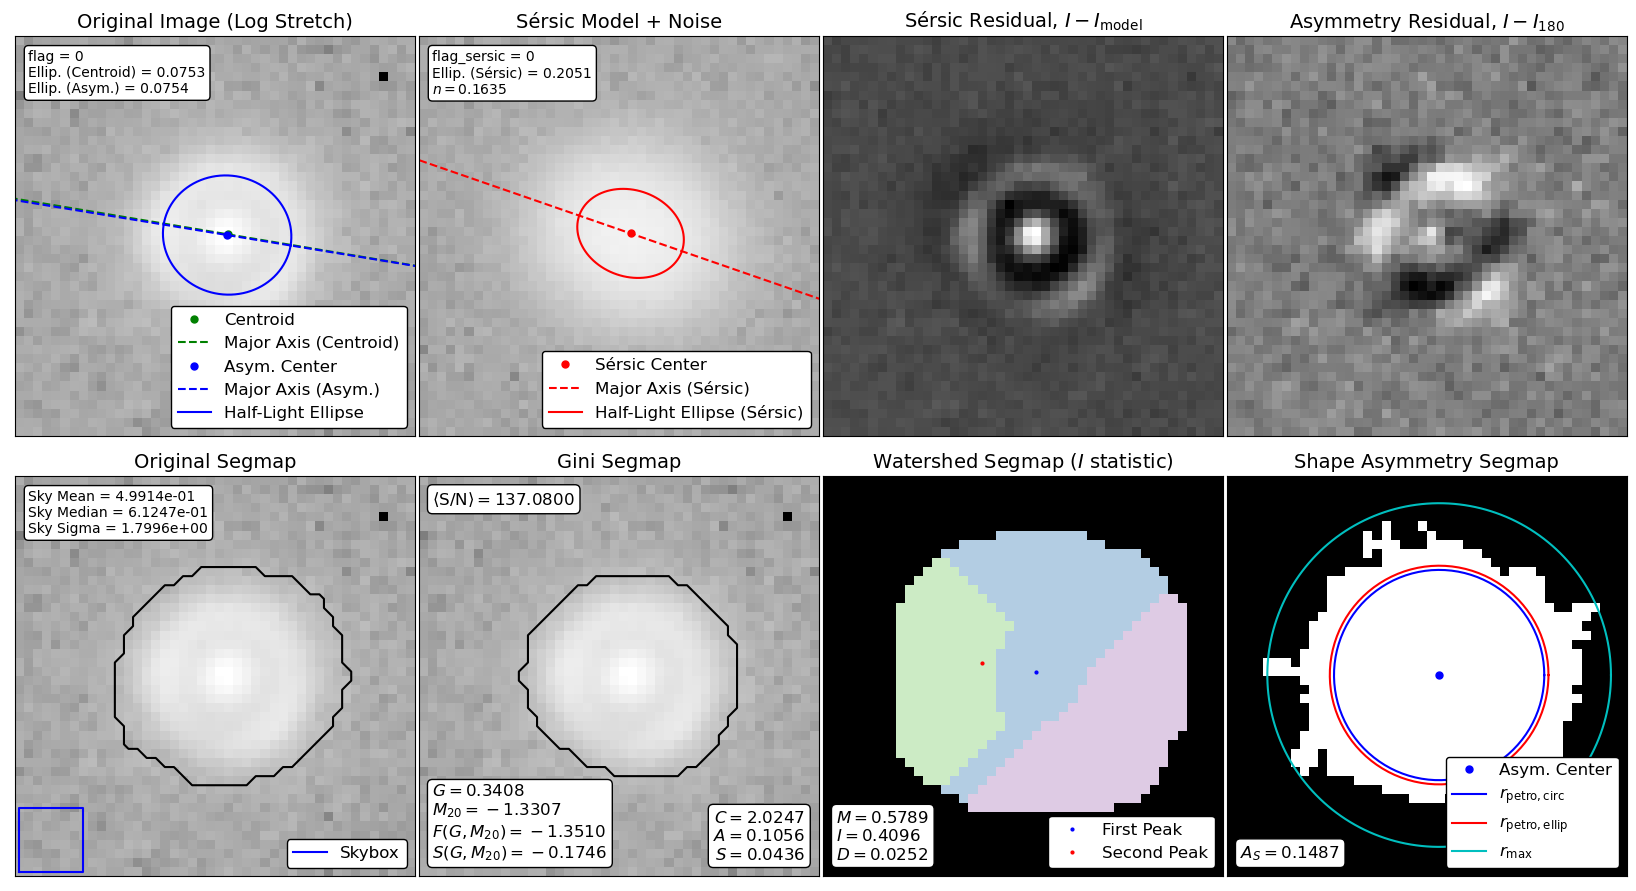

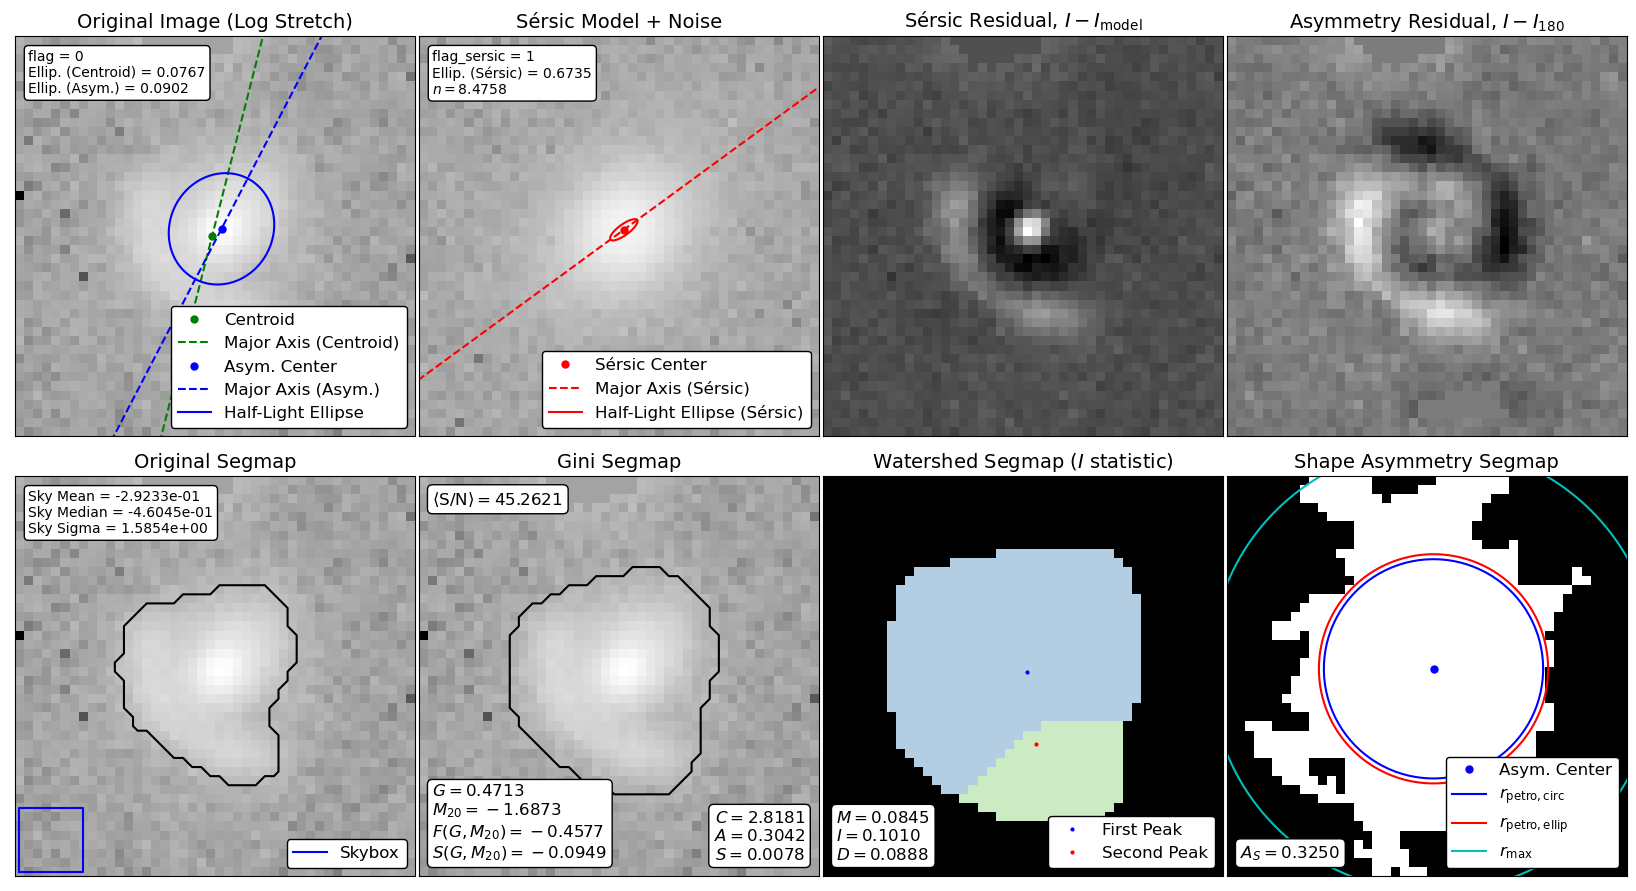

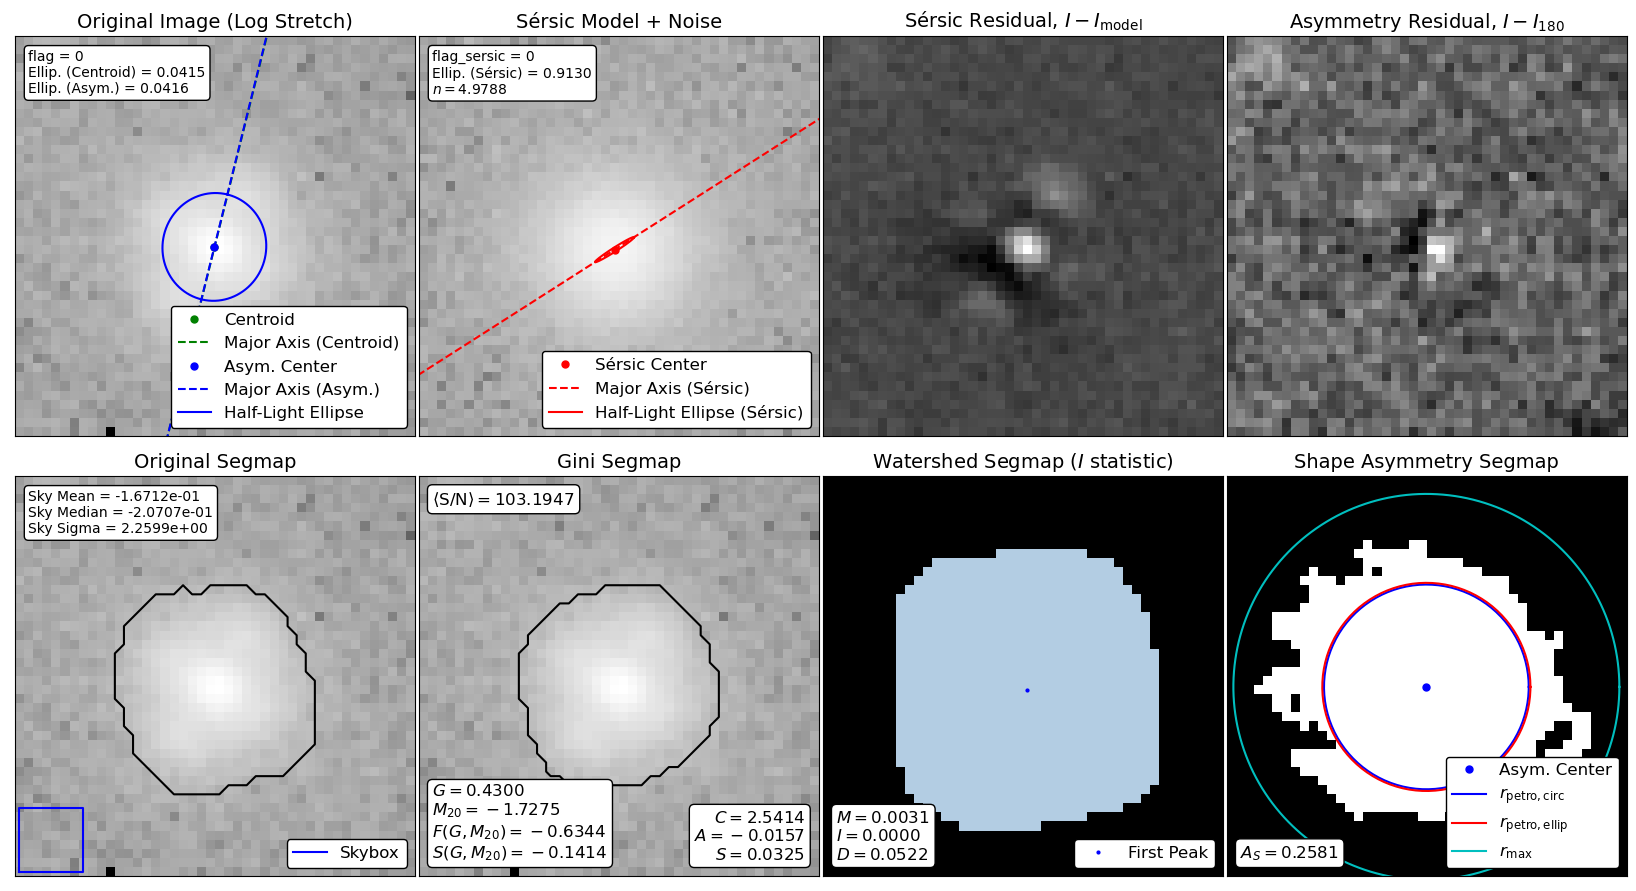

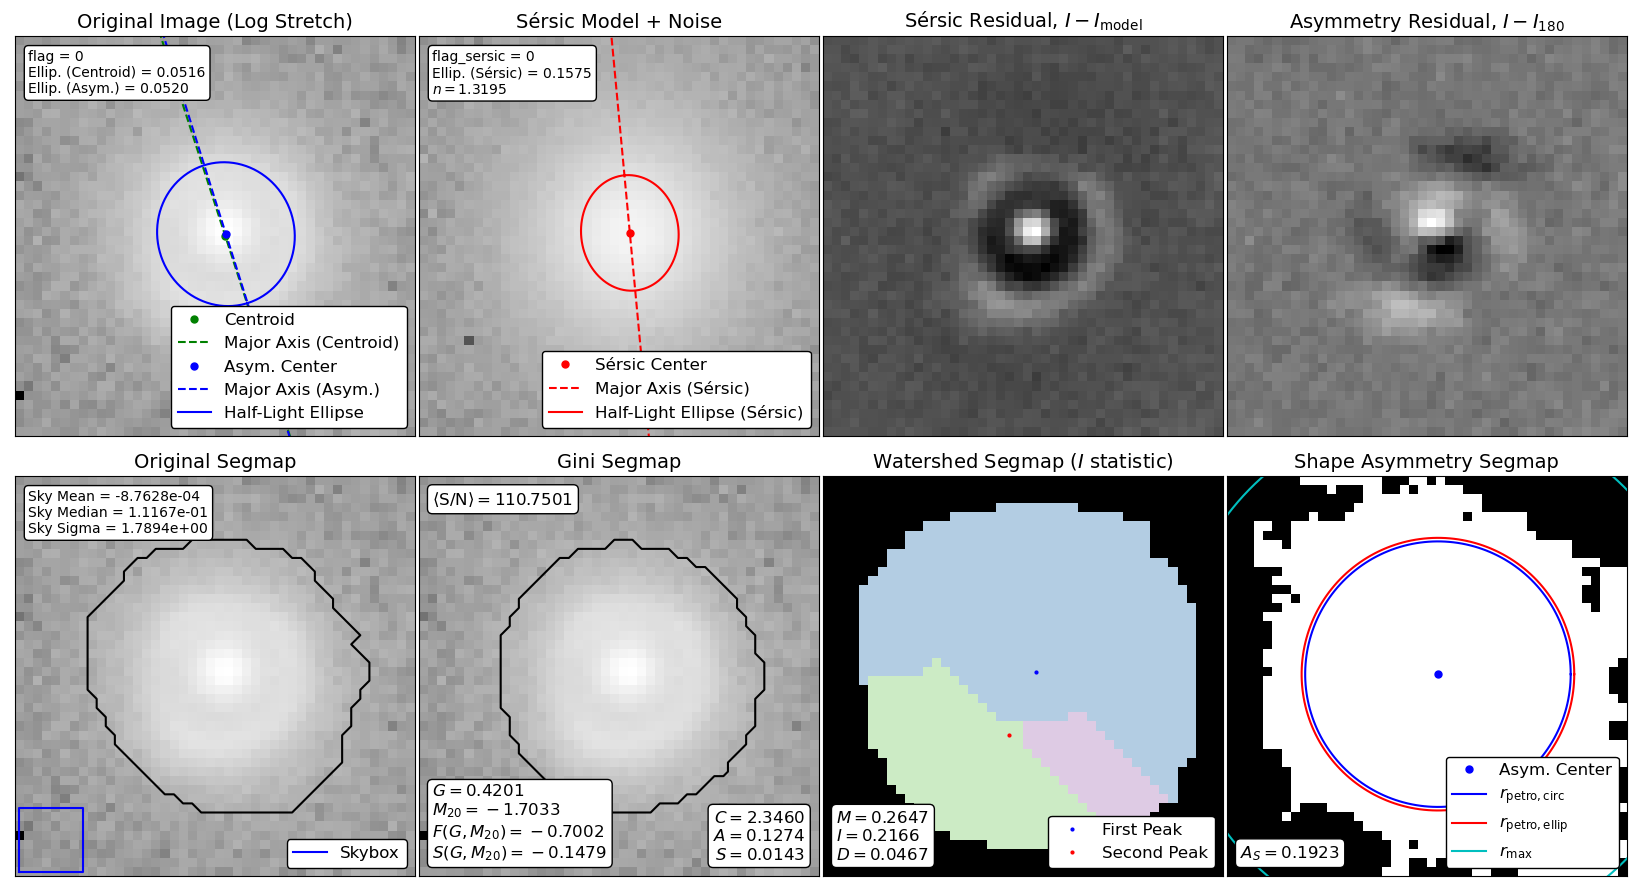

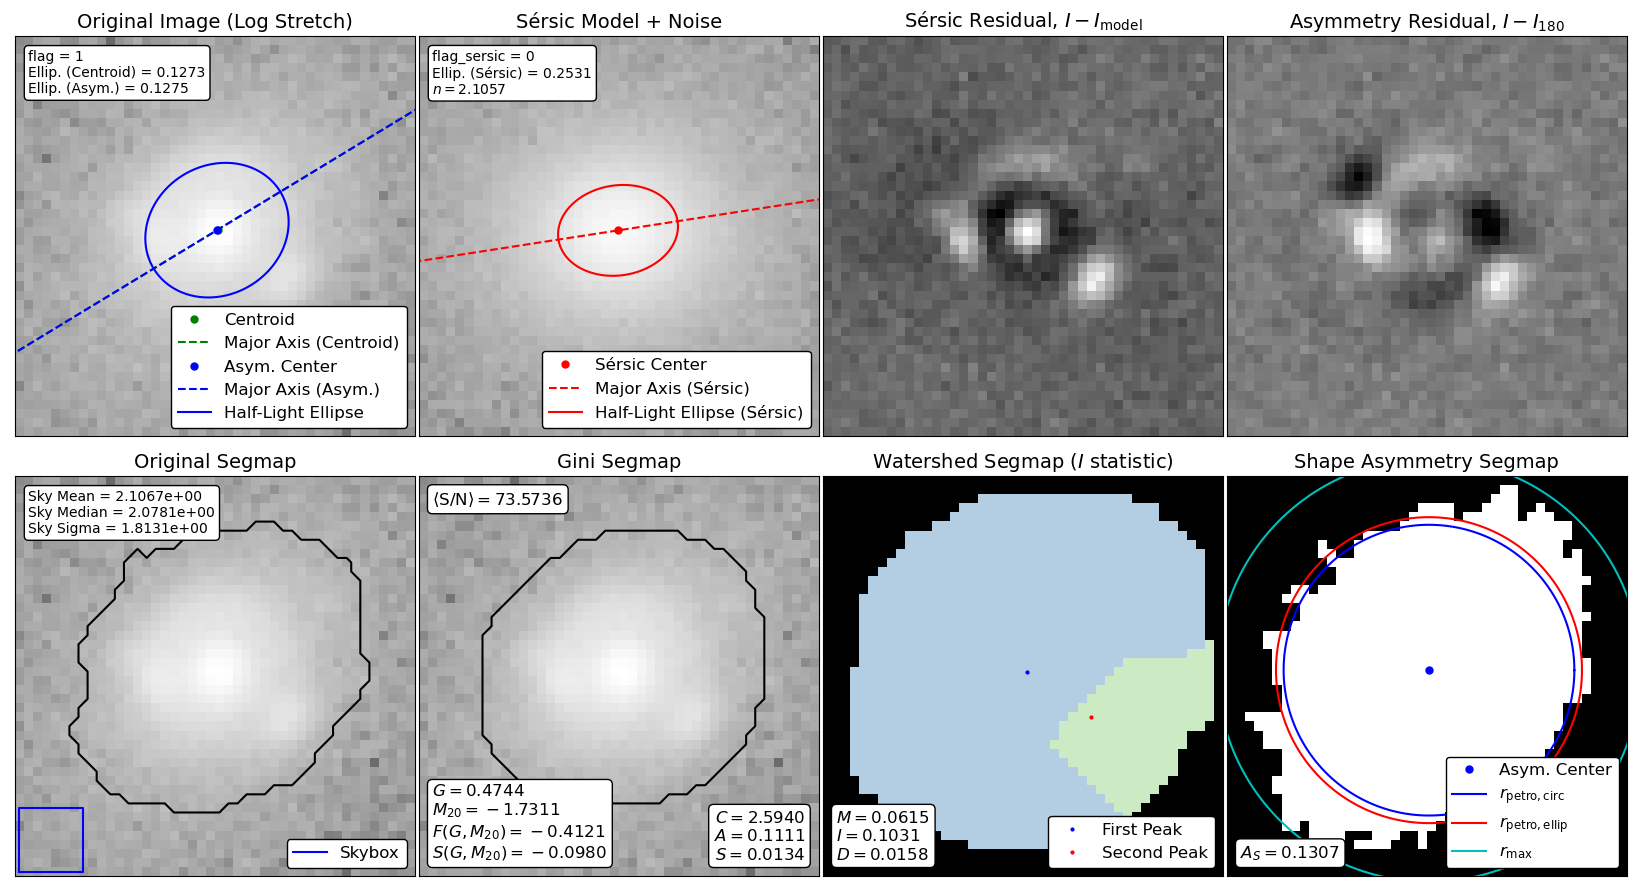

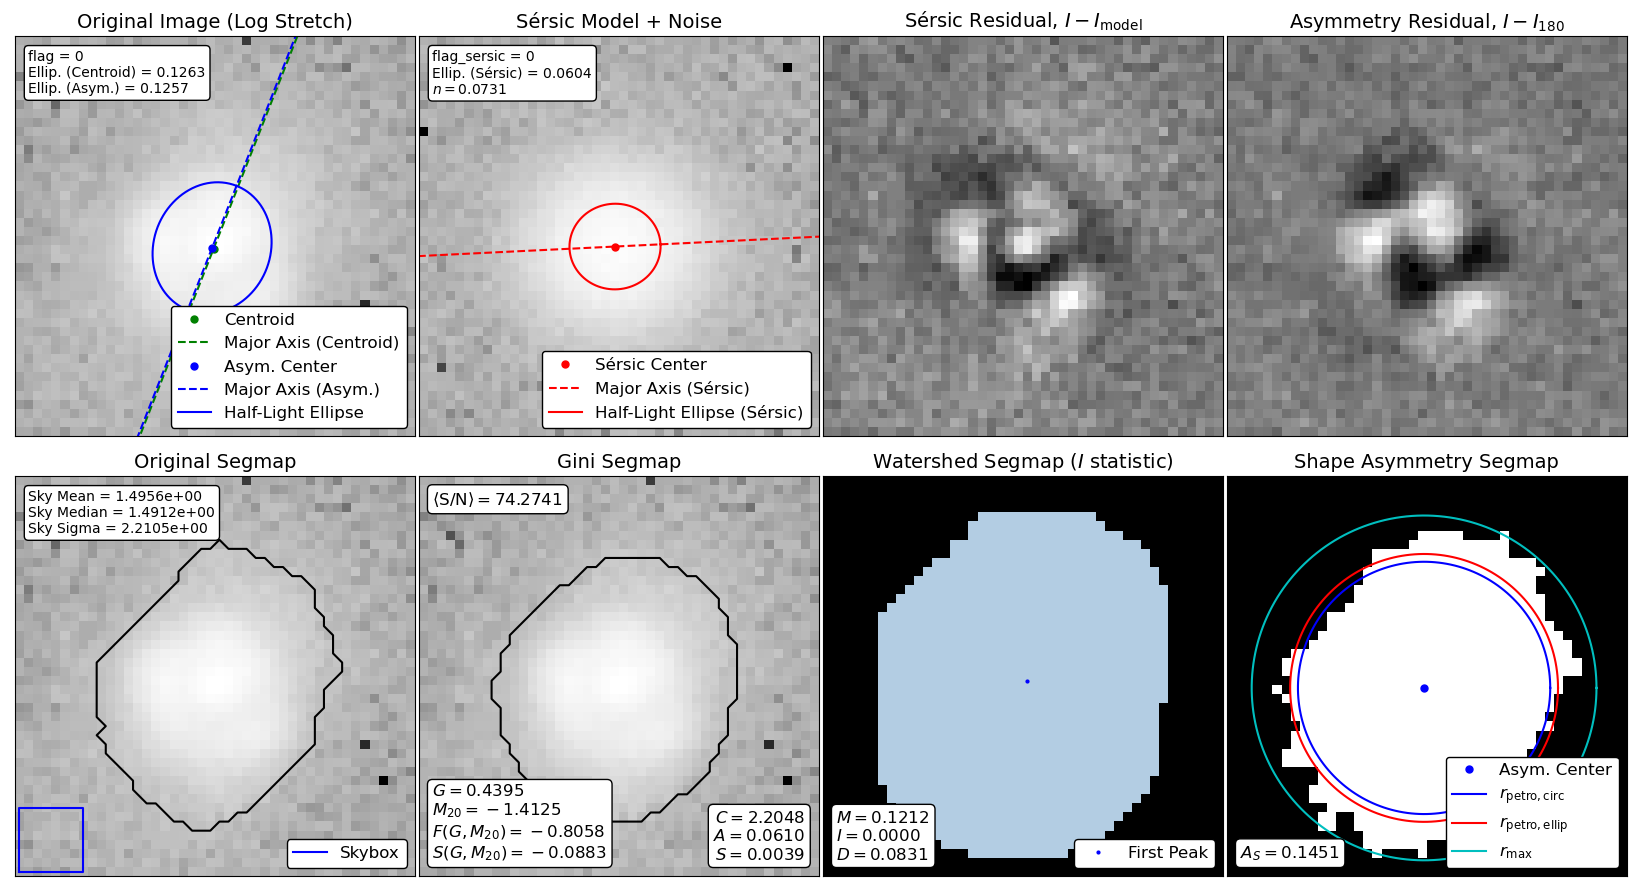

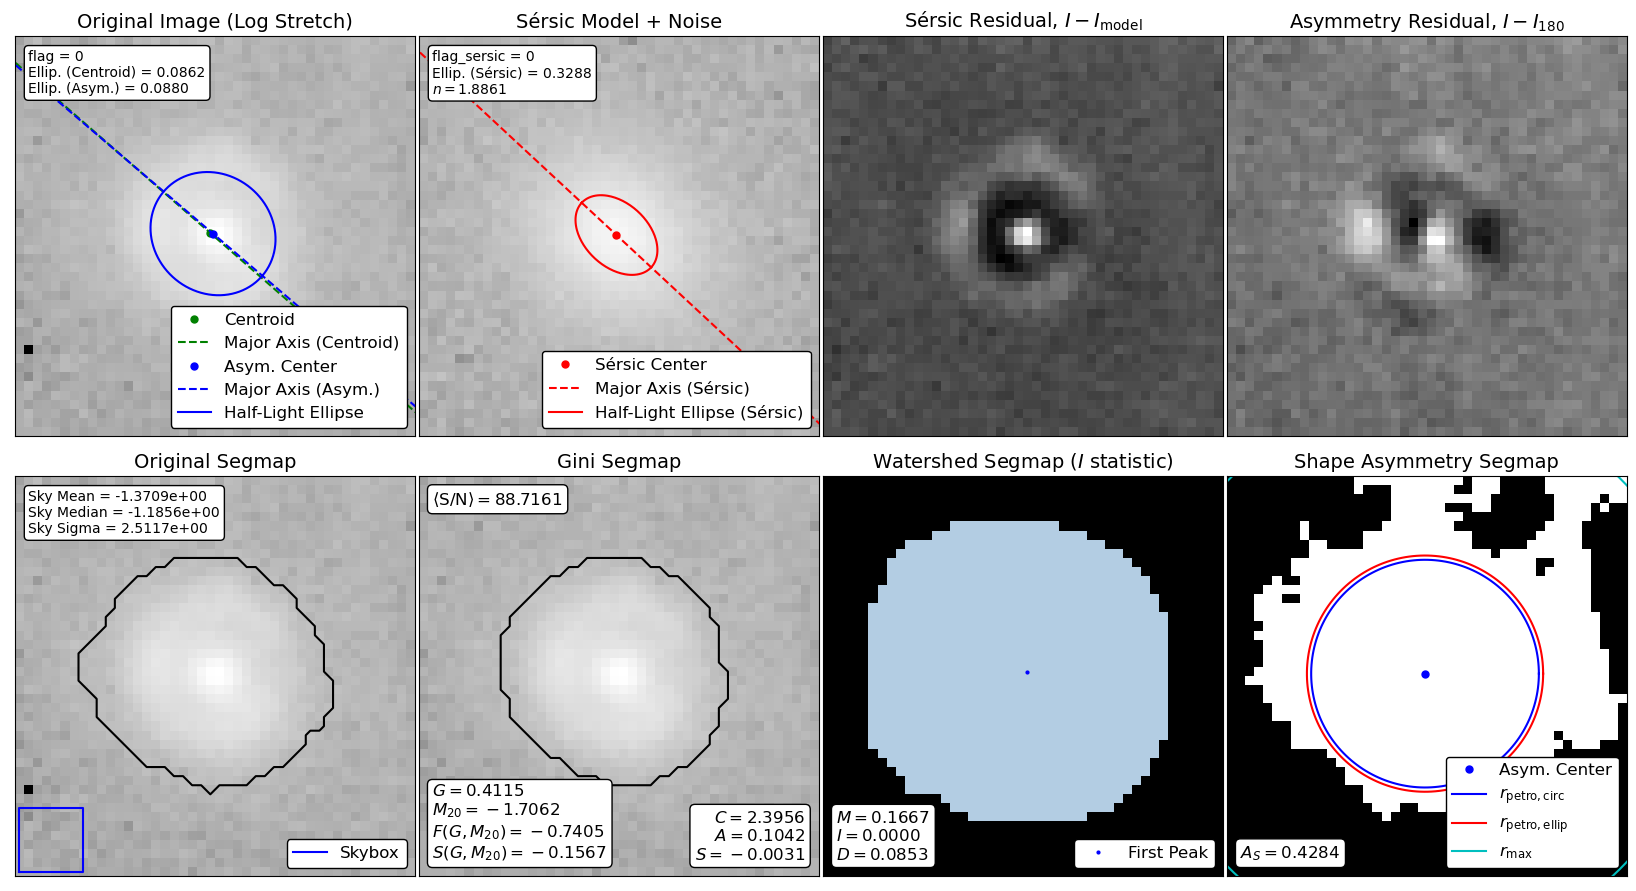

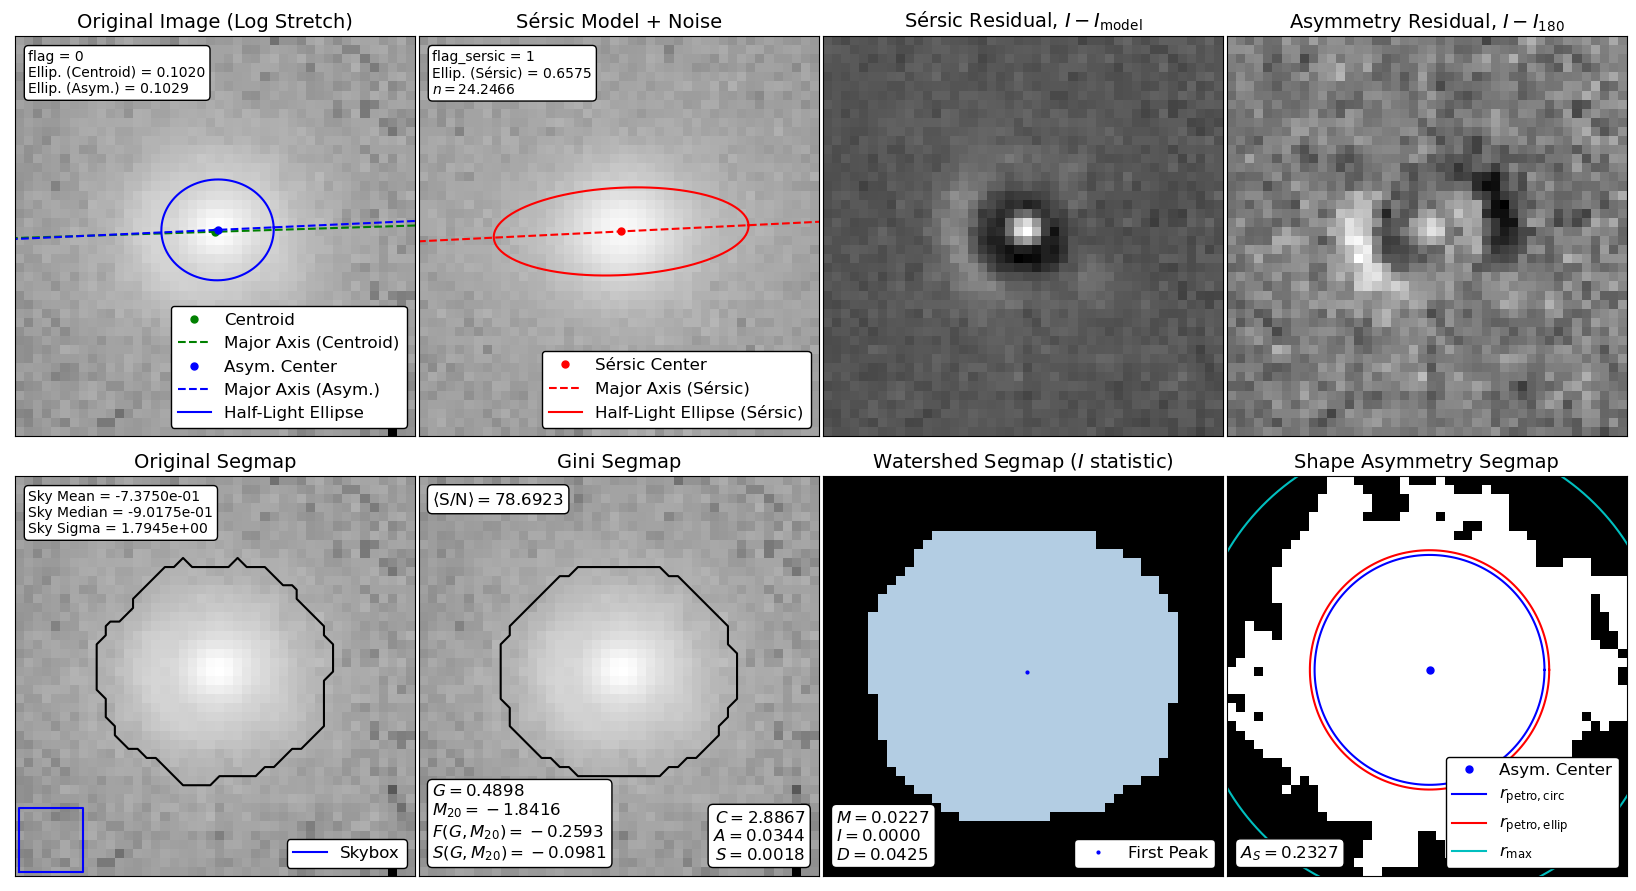

In [22]:
list_segm=[]#we will store segmentation maps

for file in files[:9]:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    td = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    psf_path=path+PSF+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    psf,psf_header=fits.getdata(psf_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    #estimation of the background
    #let's take all pixels that are background
    
    segm_float = ndi.uniform_filter(np.float64(segm.data), size=5)
    segm =1*(segm_float > 0.5)
    
    background=np.where(segm!=0,0,image)
    background_median=np.median(background)
    
    #substraction of the median
    image-=background_median
        
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask,psf=psf)
        morph = source_morphs[0]
        print(file)
        print(f'flag_sersic={morph.flag_sersic}')
        print(f'flag={morph.flag}')
        print('sersic_amplitude =', morph.sersic_amplitude)
        print('sersic_rhalf =', morph.sersic_rhalf)
        print('sersic_n =', morph.sersic_n)
        print('sersic_xc =', morph.sersic_xc)
        print('sersic_yc =', morph.sersic_yc)
        print('sersic_ellip =', morph.sersic_ellip)
        print('sersic_theta =', morph.sersic_theta,'\n')
        fig = make_figure(morph)
    except:
        print('bug')

## Test with substraction of median value with background estimator from photutils

57037.fits
flag_sersic=0
flag=0
sersic_amplitude = 124.17708292696112
sersic_rhalf = 1.1102176363540708
sersic_n = 2.5691873113292316
sersic_xc = 22.0118574506112
sersic_yc = 21.01222971849224
sersic_ellip = 0.8879734749211992
sersic_theta = 0.861523564956312 



52289.fits
flag_sersic=1
flag=1
sersic_amplitude = 29.112254033582982
sersic_rhalf = 3.7991145698200333
sersic_n = 1.0
sersic_xc = 22.21117440599447
sersic_yc = 22.165252734643623
sersic_ellip = 0.4493421289421541
sersic_theta = 1.6992753533466367 

42292.fits
flag_sersic=0
flag=0
sersic_amplitude = 106.2881751090905
sersic_rhalf = 1.2273524972691414
sersic_n = 2.864000186255748
sersic_xc = 21.009614154502263
sersic_yc = 20.986663580596066
sersic_ellip = 0.9376631100710051
sersic_theta = 2.2171908963933498 

138916.fits
flag_sersic=0
flag=0
sersic_amplitude = 80.04968592474073
sersic_rhalf = 1.281587914642398
sersic_n = 4.019070794361641
sersic_xc = 23.02993334163468
sersic_yc = 21.97652067867237
sersic_ellip = 1.0445308298413554
sersic_theta = 2.4878664500181342 

5856.fits
flag_sersic=0
flag=0
sersic_amplitude = 29.562037395451462
sersic_rhalf = 2.4932802081345122
sersic_n = 4.451112366412195
sersic_xc = 23.0442513384142
sersic_yc = 21.959471898117396
sersic_ellip = 0.958127419165736

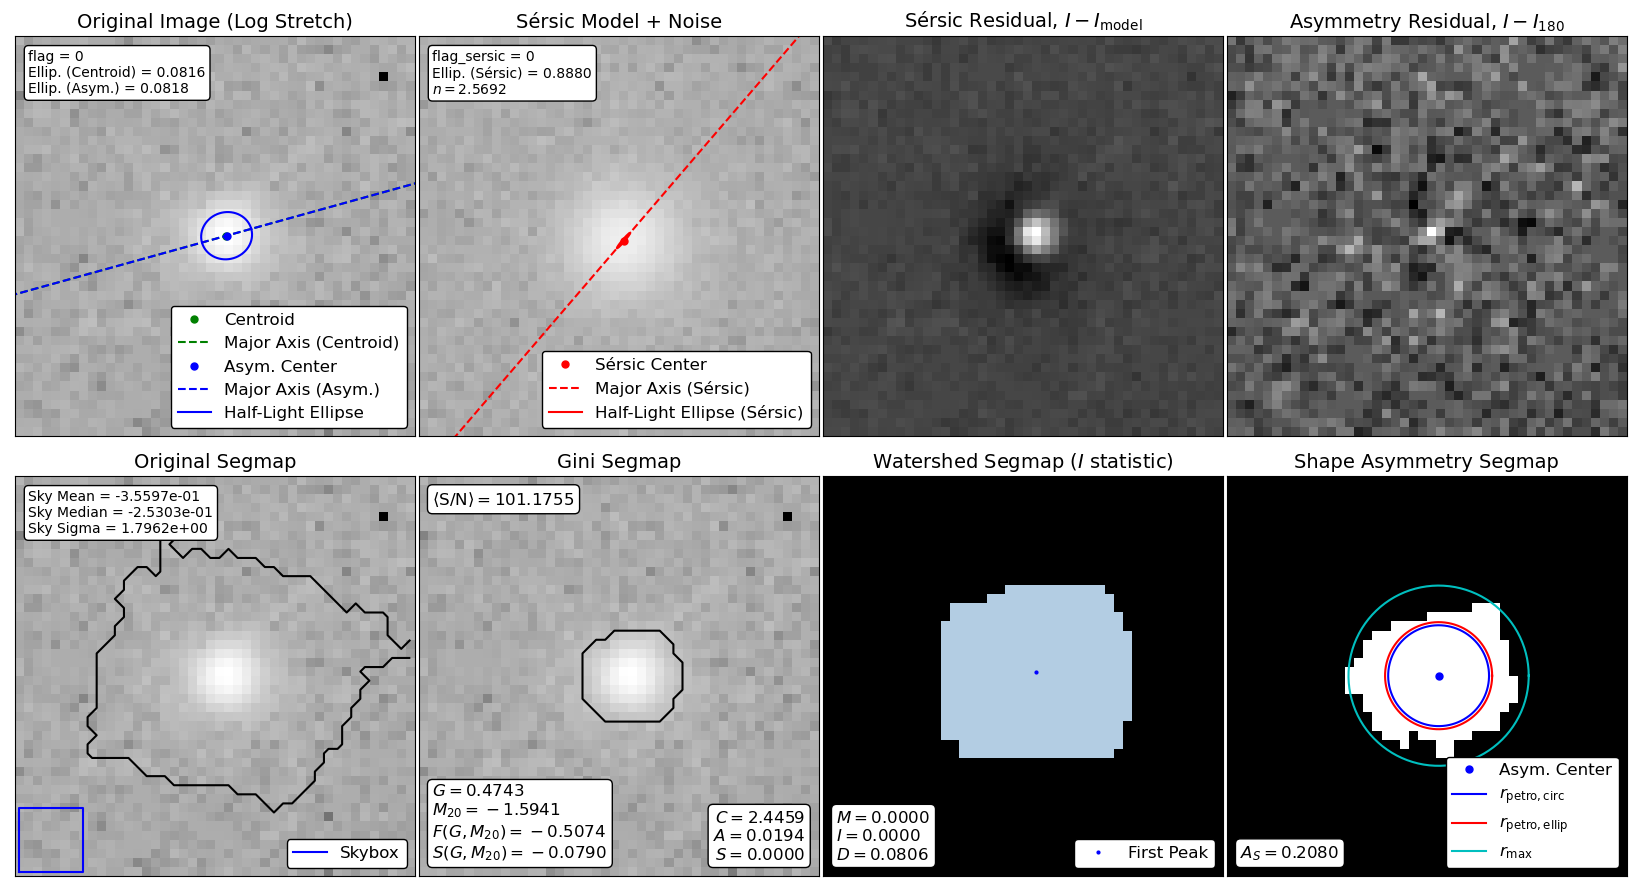

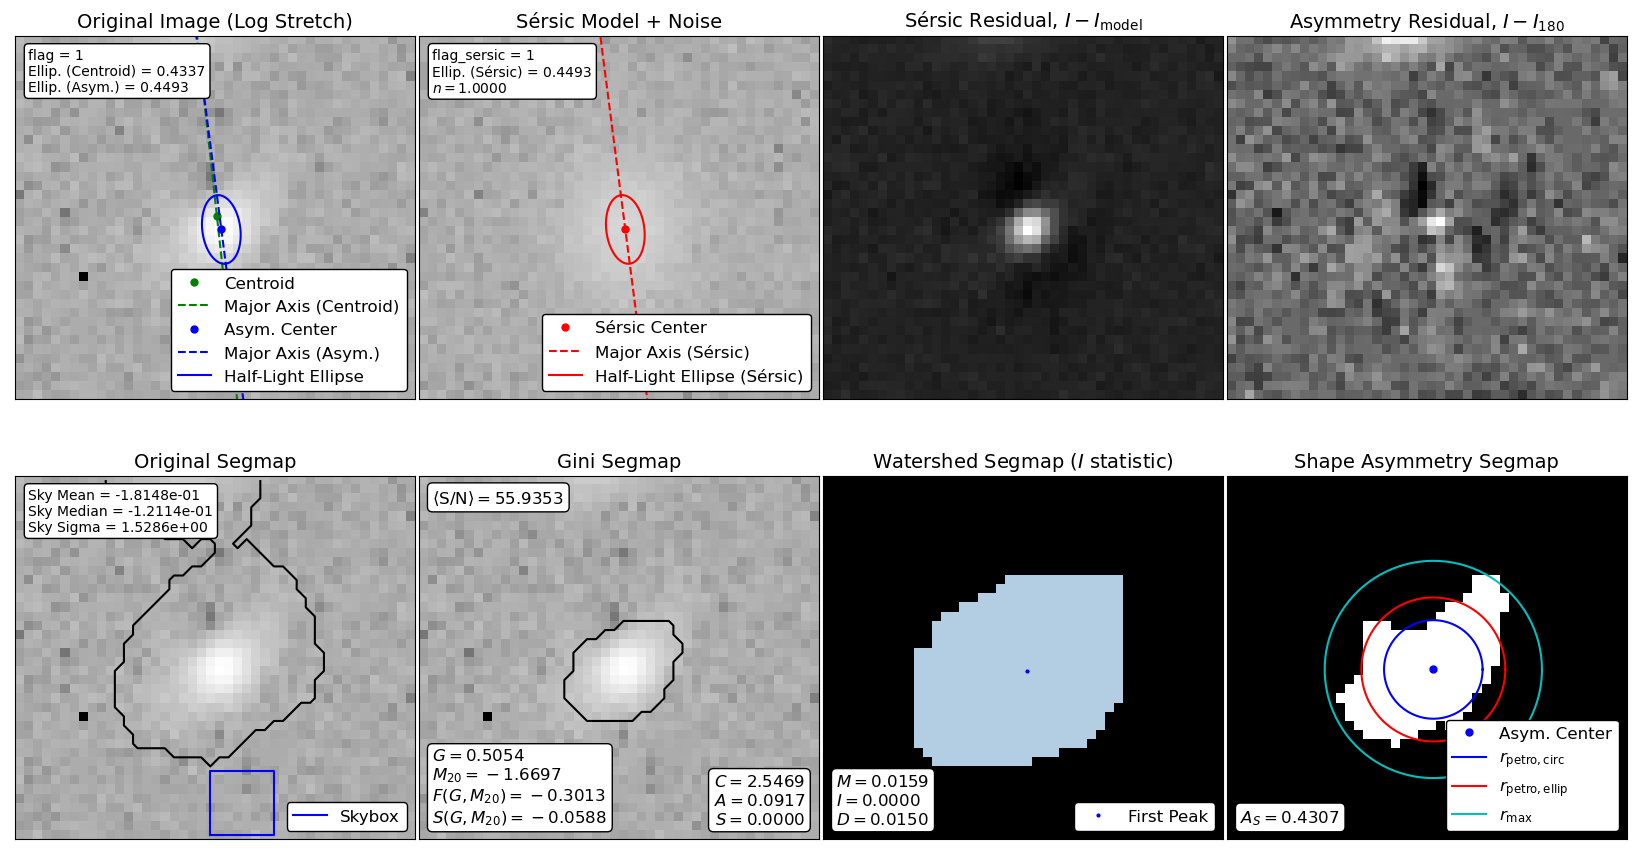

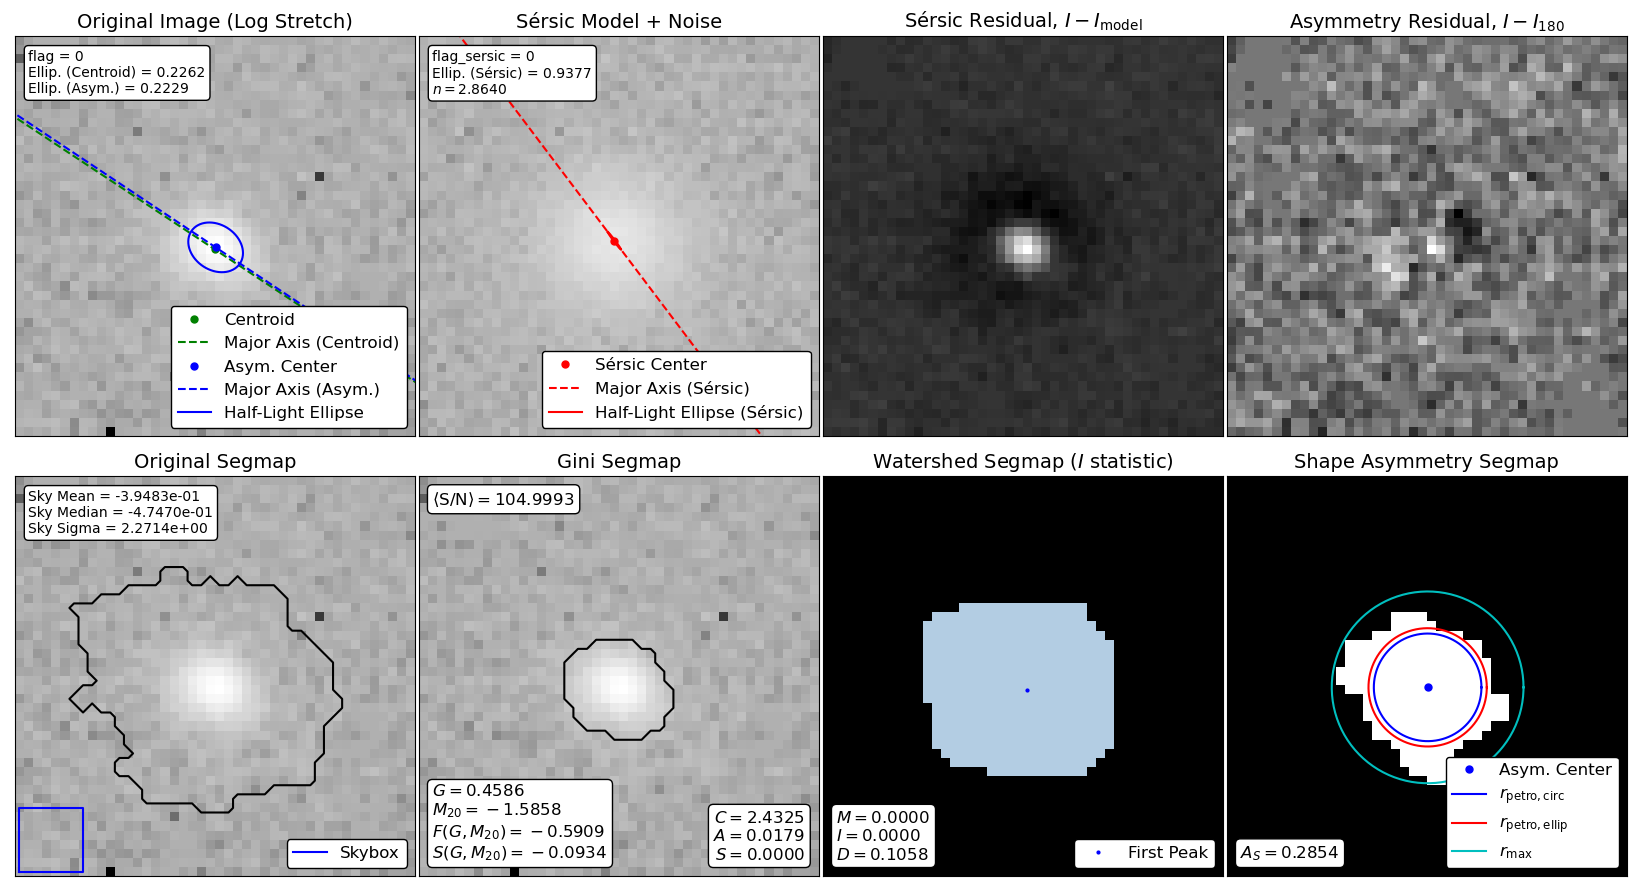

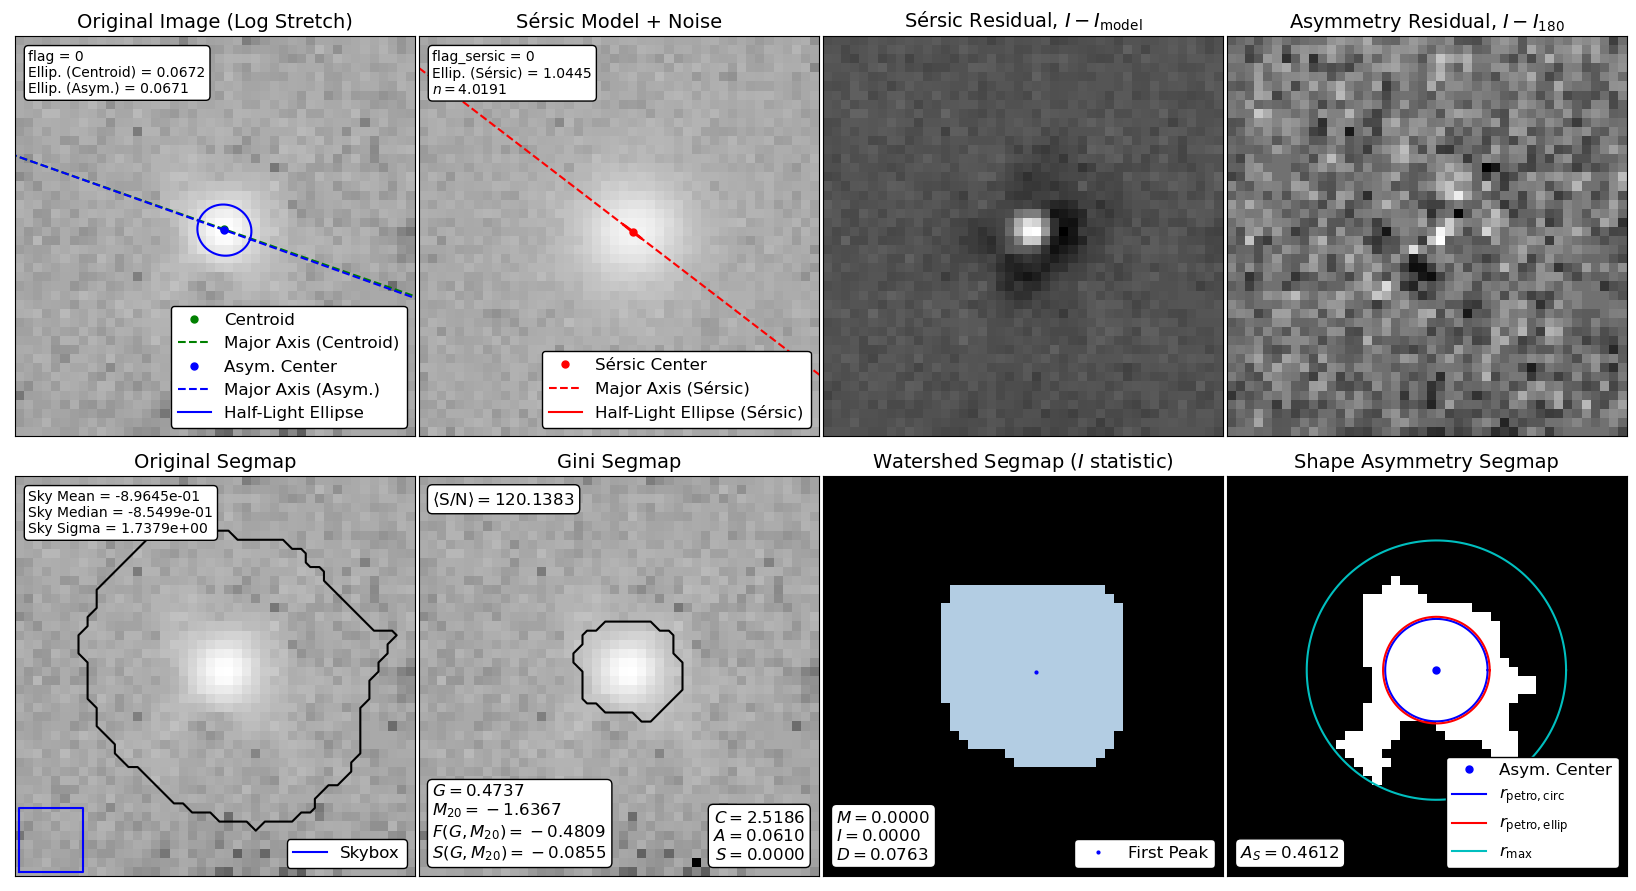

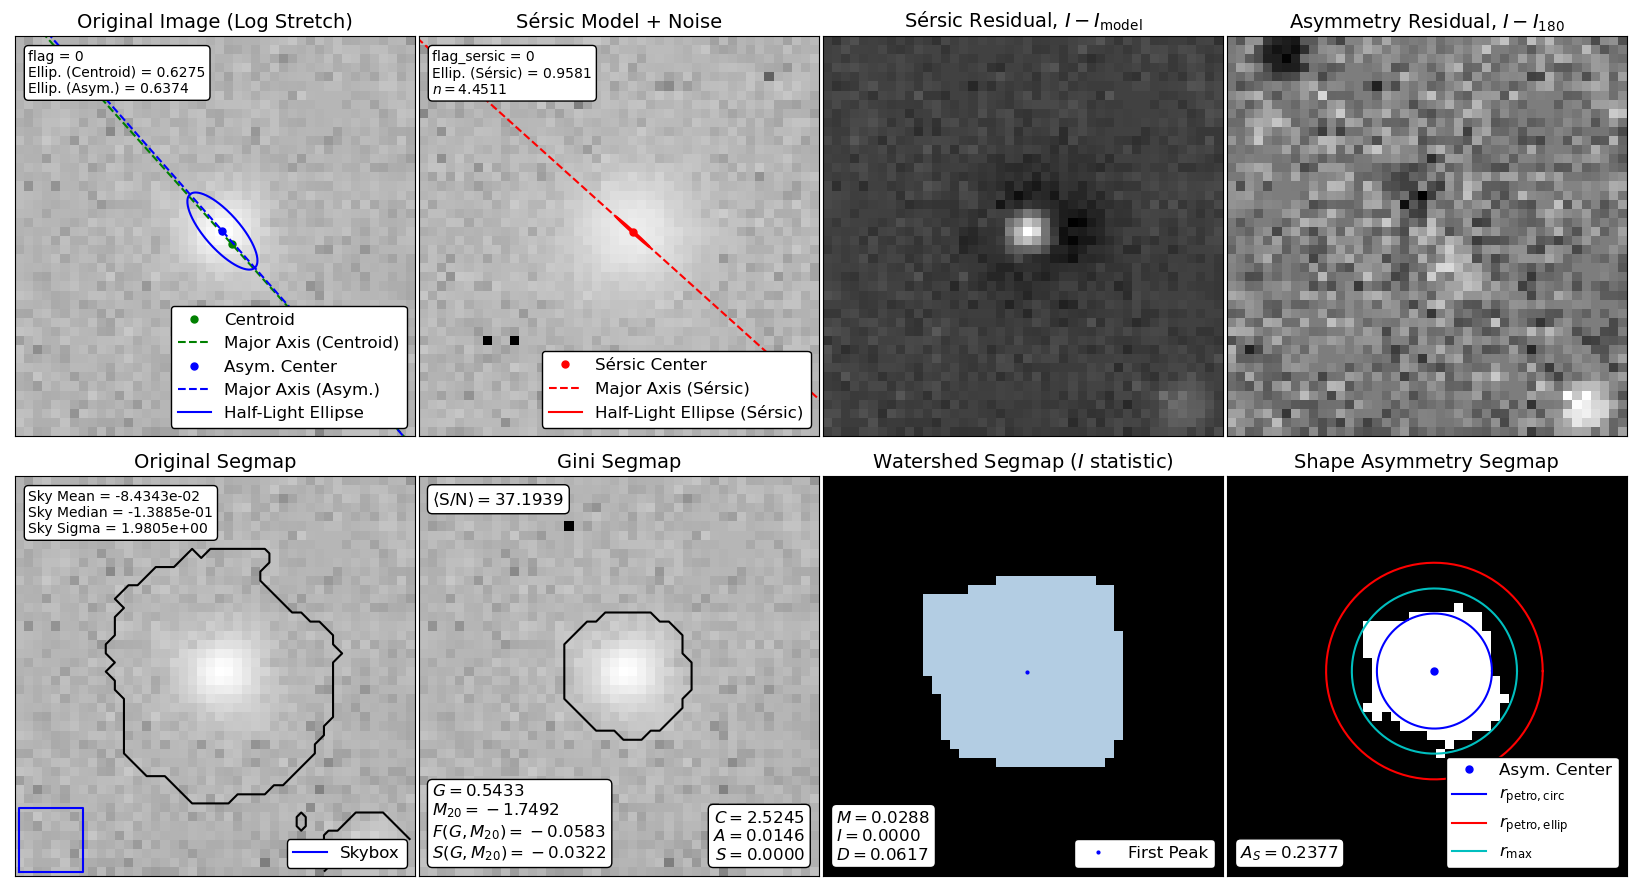

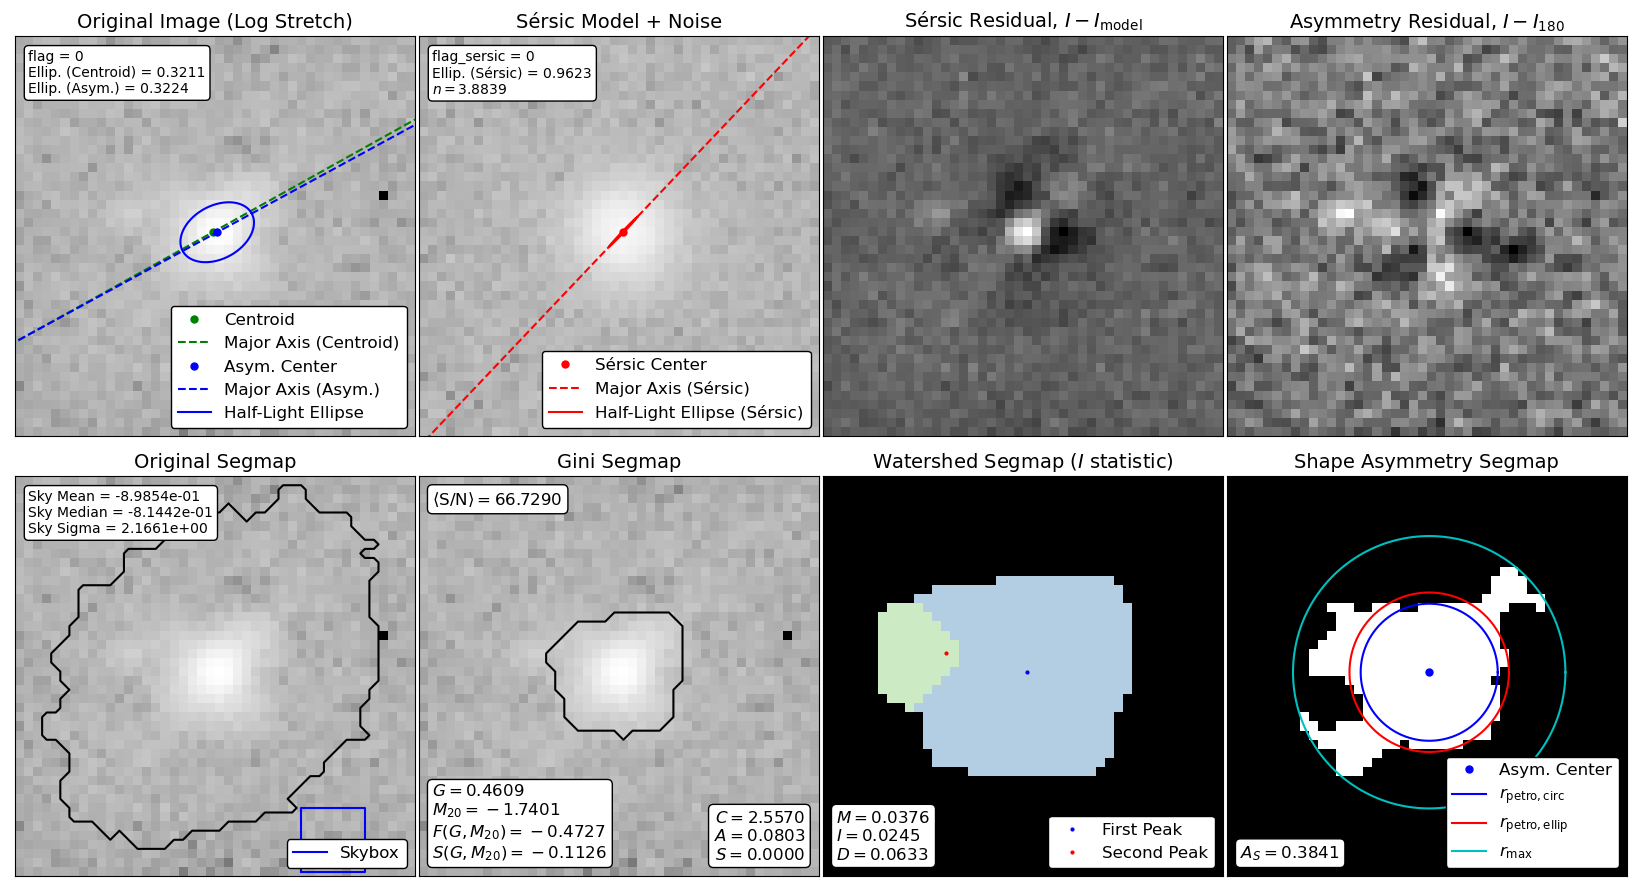

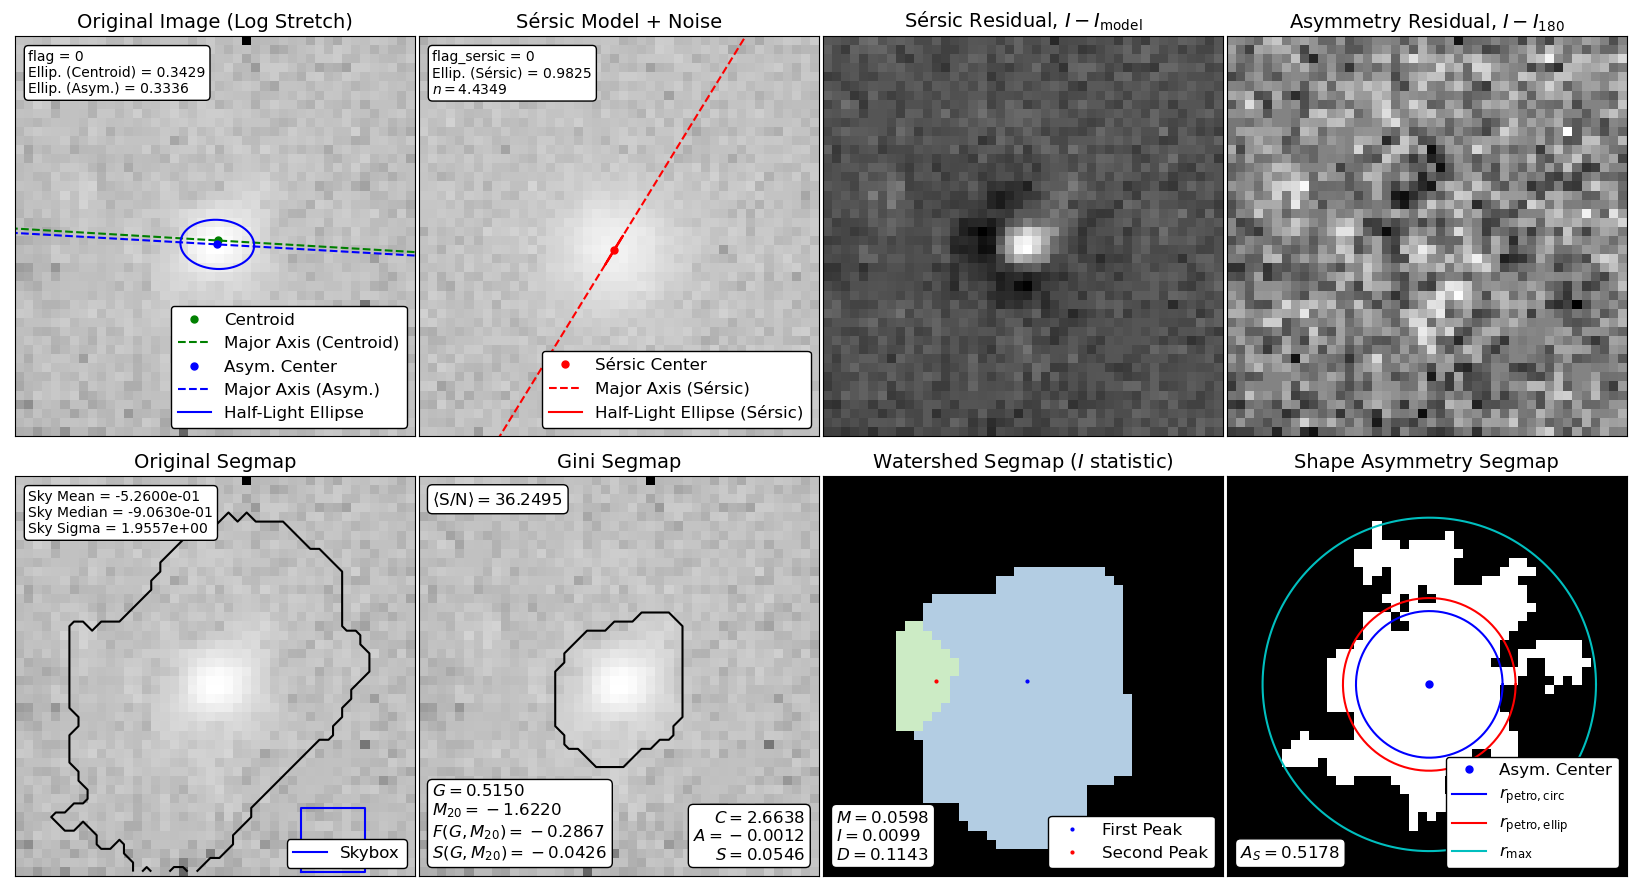

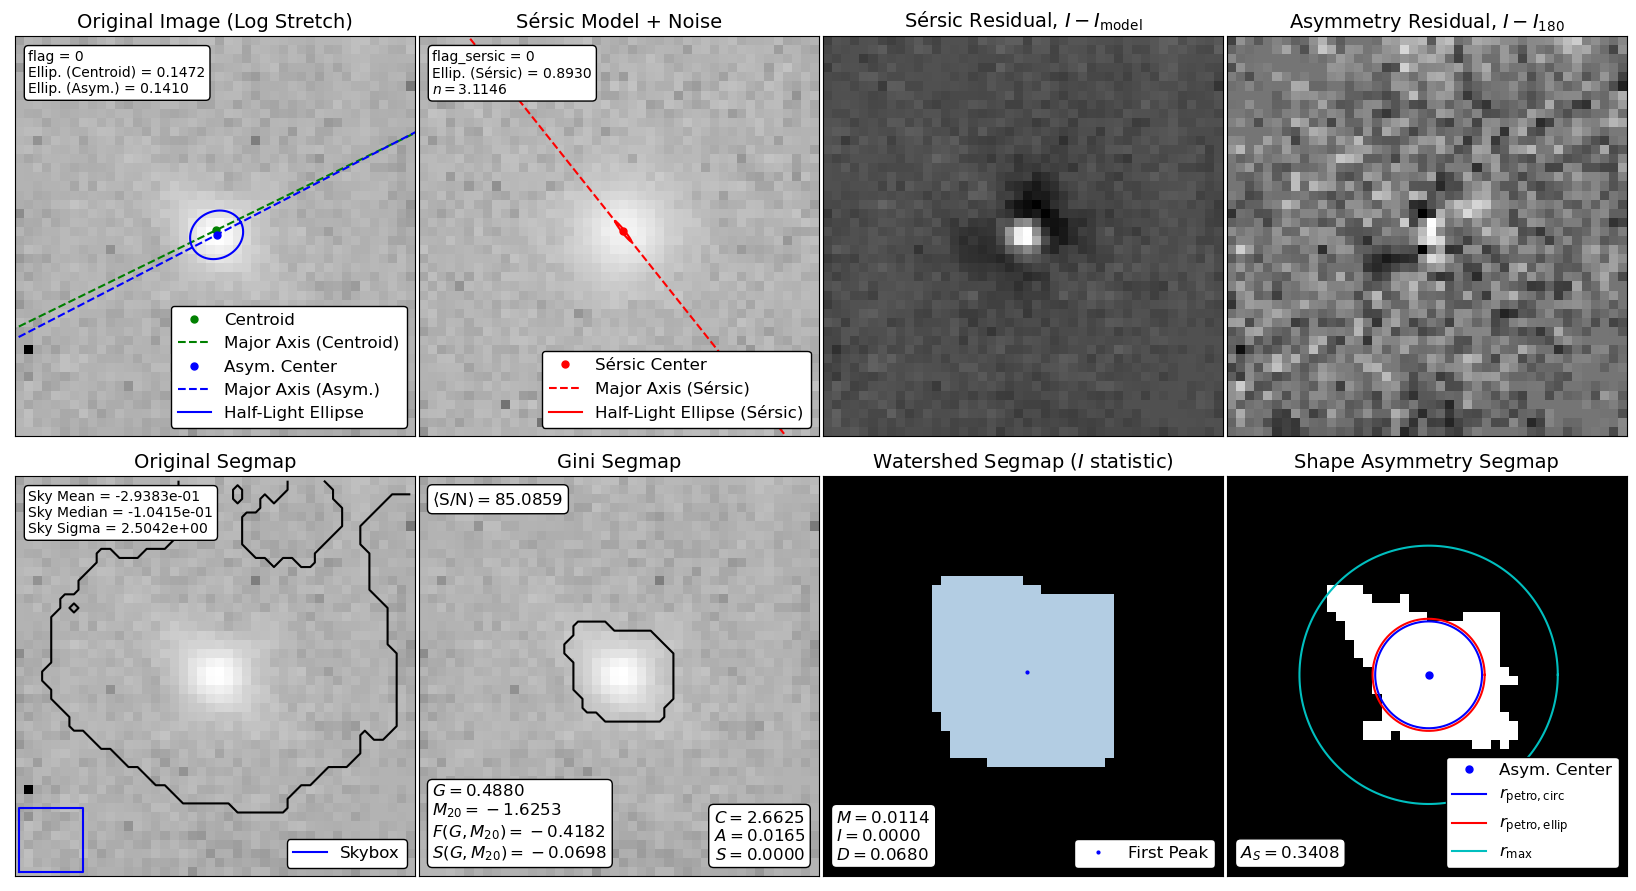

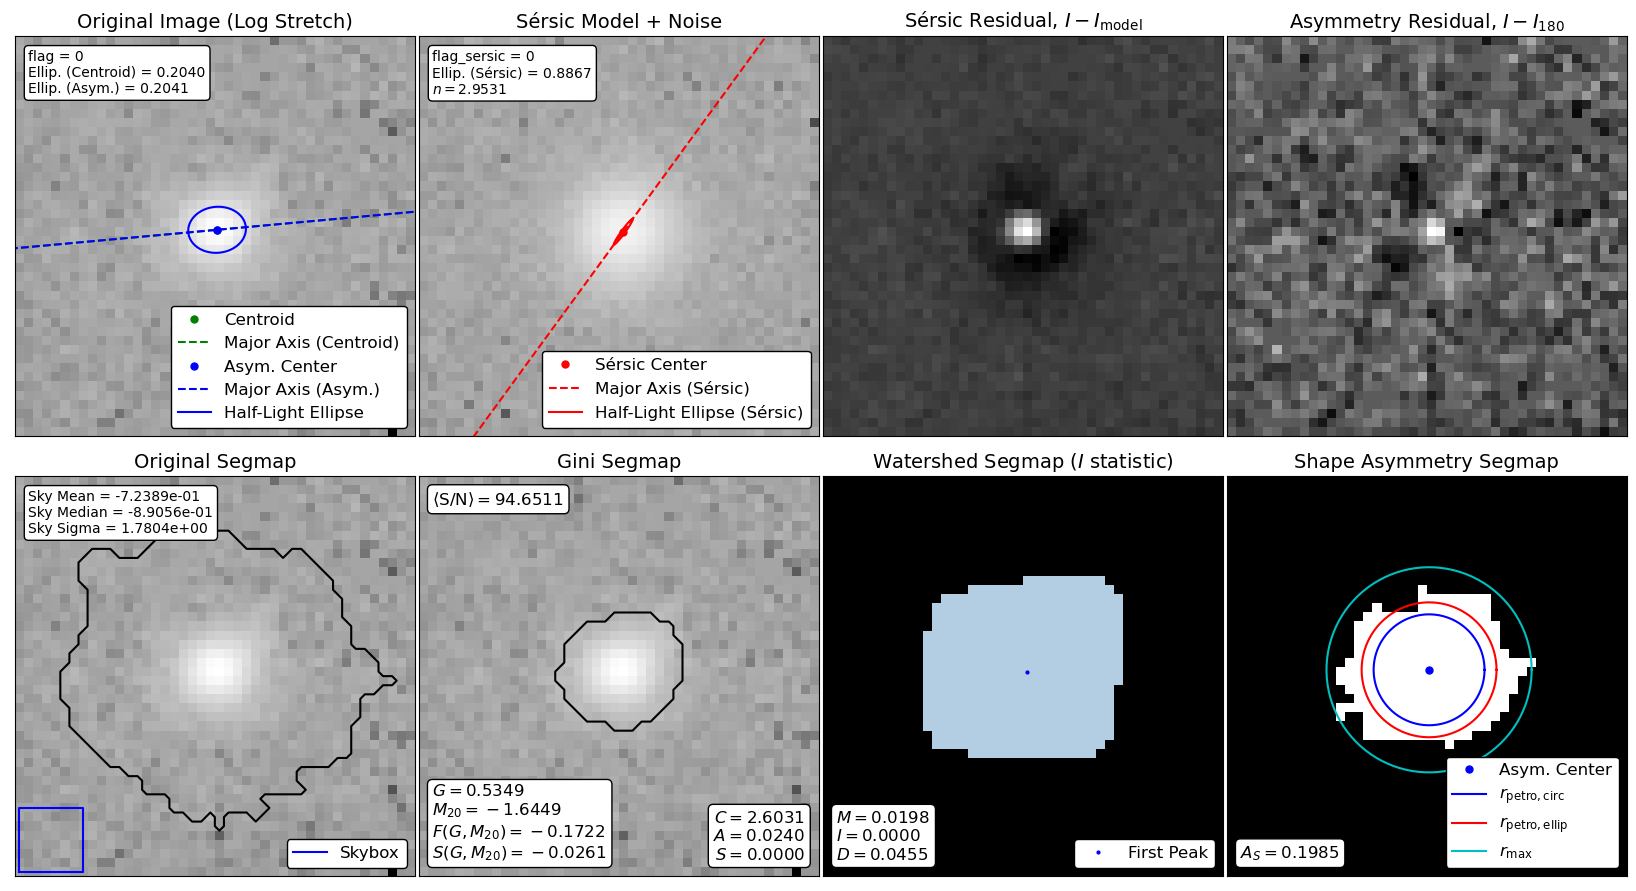

In [37]:
from photutils.background import Background2D, MedianBackground

list_segm=[]#we will store segmentation maps

for file in files[:9]:#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    std = mad_std(image)
    threshold=std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    psf_path=path+PSF+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    psf,psf_header=fits.getdata(psf_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    #estimation of the background
    #let's take the median estimator
    
    segm_float = ndi.uniform_filter(np.float64(segm.data), size=5)
    segm =1*(segm_float > 0.5)
    
    background=np.where(segm!=0,0,image)

    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    #plt.imshow(image)
    #plt.show()
    #plt.imshow(bkg.background)
    #plt.show()

    image -= bkg.background  # subtract the background
        
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask,psf=psf)
        morph = source_morphs[0]
        print(file)
        print(f'flag_sersic={morph.flag_sersic}')
        print(f'flag={morph.flag}')
        print('sersic_amplitude =', morph.sersic_amplitude)
        print('sersic_rhalf =', morph.sersic_rhalf)
        print('sersic_n =', morph.sersic_n)
        print('sersic_xc =', morph.sersic_xc)
        print('sersic_yc =', morph.sersic_yc)
        print('sersic_ellip =', morph.sersic_ellip)
        print('sersic_theta =', morph.sersic_theta,'\n')
        fig = make_figure(morph)
    except:
        print('bug')

## Testing Gini error

In [24]:
from photutils.background import Background2D, MedianBackground

list_segm=[]#we will store segmentation maps
gini=[]
normal=[]

for file in files[:30]:#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    psf_path=path+PSF+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    psf,psf_header=fits.getdata(psf_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    #estimation of the background
    #let's take the median estimator
    
    #segm_float = ndi.uniform_filter(np.float64(segm.data), size=5)
    #segm =1*(segm_float > 0.5)
    
    #background=np.where(segm!=0,0,image)

    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    image -= bkg.background  # subtract the background
    try:
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always")
            source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask,psf=psf)
            morph = source_morphs[0]
            if (len(w)>1) and (str(w[-2].message)=='[segmap_gini] Disjoint features in Gini segmap.'):
                gini.append(file)
            elif len(w)<=1:
                normal.append(file)
    except:
        pass

In [25]:
for file in gini:
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    std = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    plt.imshow(image)
    plt.colorbar()
    plt.show()
    plt.imshow(segm.data)
    plt.show()

## Moyenne azimutal

In [ ]:
def radial_mean(image,bin=5):
    sx,sy=np.shape(image)
    x_0,y_0=sx/2,sy/2

/tmp/ipykernel_12644/1279470363.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rbin = (20* r/r.max()).astype(np.int)


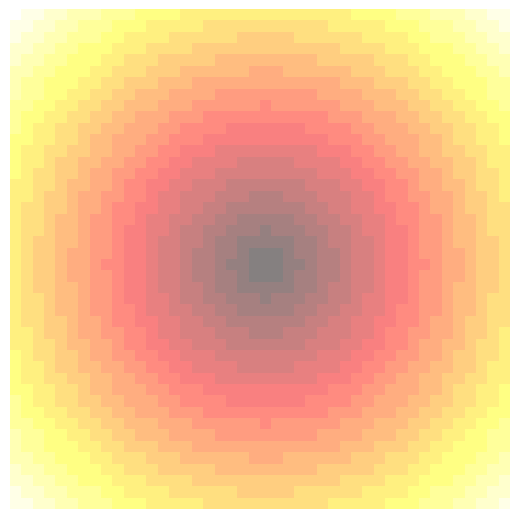

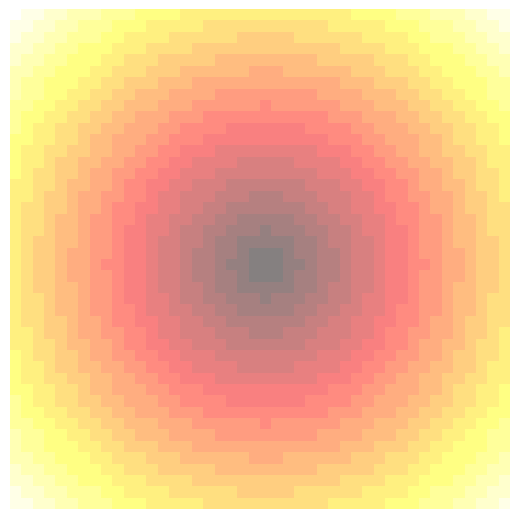

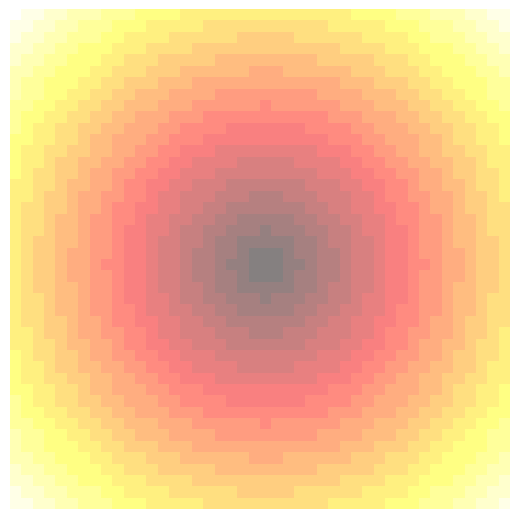

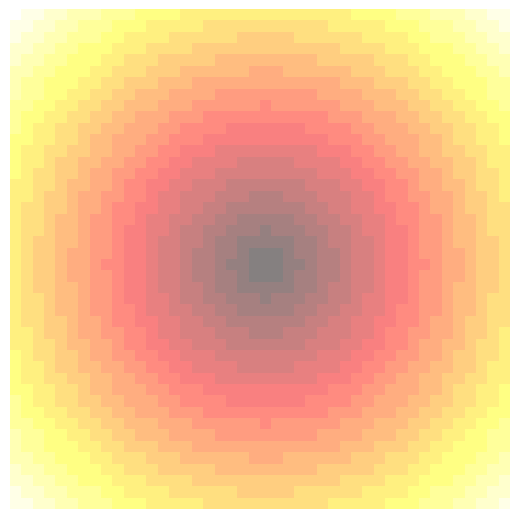

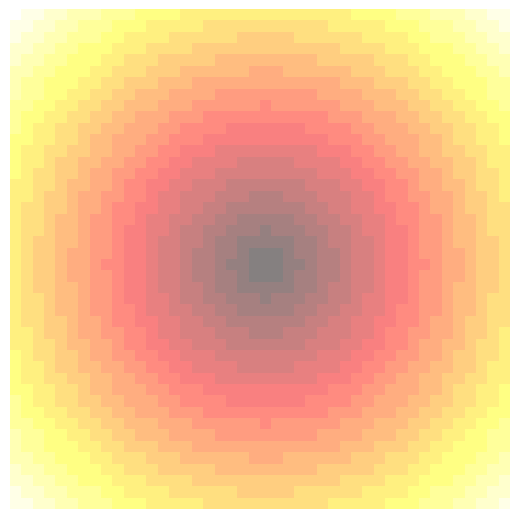

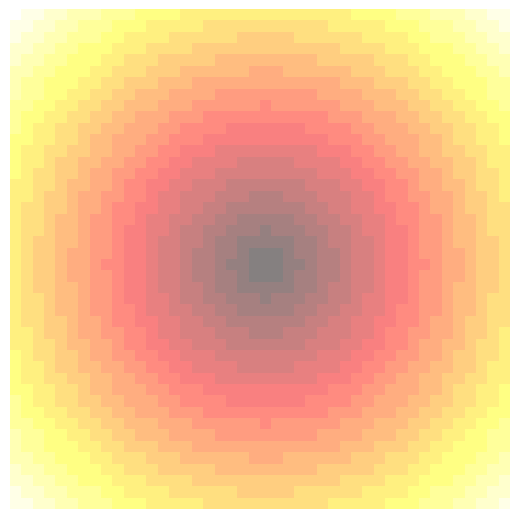

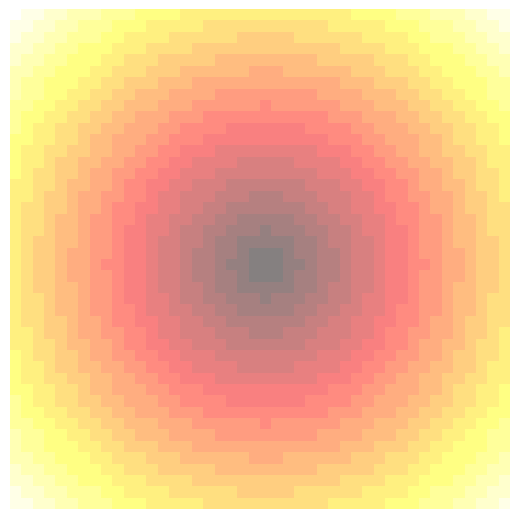

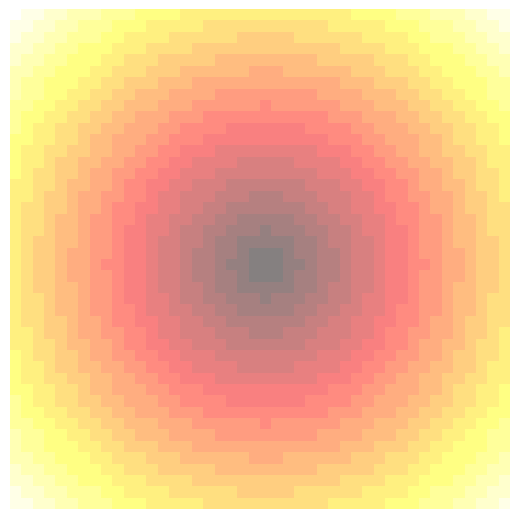

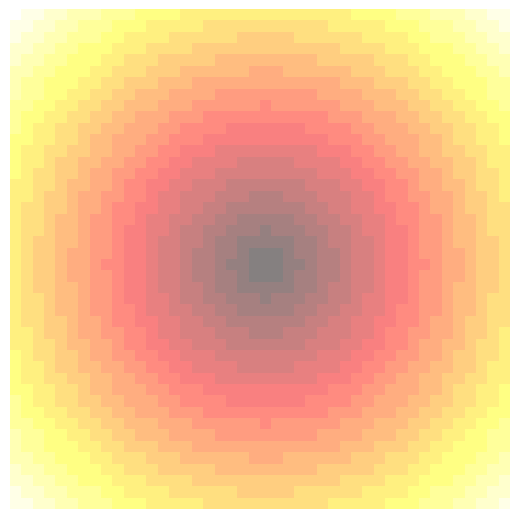

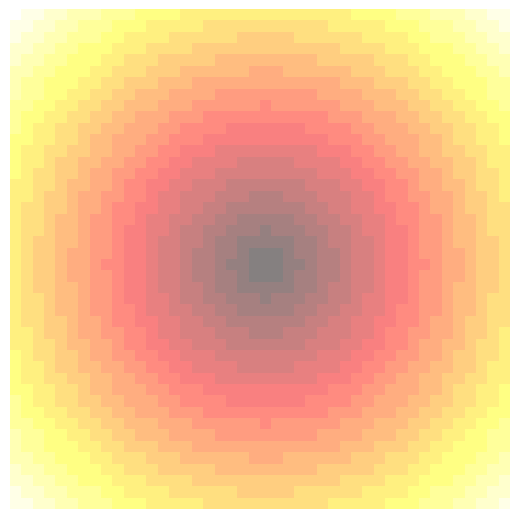

In [29]:
import numpy as np
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt

for file in files[:10]:
    file_path=path+non_lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    

## Application of statmorph on the data

note that statmorph required a background substraction. For now we just ignore warnings and errors. we will look for what's going on later !

developpers also noticed that we do not take the fit into account when flag=1 (for basic morphological params) and flag_sersic=1 (for sersic fit) and also if the radius is.... (I need to find back the documentation page for the condition)

### Application on lens simulations
**Création of a rms for the source and addition of the two rms**

57037.fits
flag_sersic=1
flag=1
sersic_amplitude = 15.015222561799215
sersic_rhalf = 7.5448194400776165
sersic_n = 1.0
sersic_xc = 22.759839939925484
sersic_yc = 21.454369565763727
sersic_ellip = 0.3364223568055884
sersic_theta = 3.000441170544693 



52289.fits
flag_sersic=1
flag=1
sersic_amplitude = 24.1109626684526
sersic_rhalf = 3.443385359636147
sersic_n = 1.0
sersic_xc = 22.596959774494316
sersic_yc = 22.619813544747156
sersic_ellip = 0.1493199895358498
sersic_theta = 1.2604900640332721 

42292.fits
flag_sersic=0
flag=0
sersic_amplitude = 34.01017533735806
sersic_rhalf = 2.449428745735317
sersic_n = 10.253959382257
sersic_xc = 21.894177451278075
sersic_yc = 20.0121106949004
sersic_ellip = 0.9820662526229135
sersic_theta = 3.026720180231995 



138916.fits
flag_sersic=1
flag=1
sersic_amplitude = 33.97098322543171
sersic_rhalf = 3.348122552818163
sersic_n = 1.0
sersic_xc = 22.57258121057305
sersic_yc = 22.183568121802264
sersic_ellip = 0.17564413130100487
sersic_theta = 1.1680427126479482 

bug
31350.fits
flag_sersic=0
flag=0
sersic_amplitude = 30.54338979096874
sersic_rhalf = 4.306801661781138
sersic_n = 3.560394650190916
sersic_xc = 21.972437880938454
sersic_yc = 22.003695245763407
sersic_ellip = 1.0333644112413531
sersic_theta = 3.0244762419244084 

bug


137514.fits
flag_sersic=1
flag=1
sersic_amplitude = 9.074469885809576
sersic_rhalf = 4.325859518122167
sersic_n = 1.0
sersic_xc = 21.623794597221124
sersic_yc = 21.63523203159631
sersic_ellip = 0.2456905718767295
sersic_theta = 2.2266596323217684 

90342.fits
flag_sersic=0
flag=0
sersic_amplitude = 114.17743062656858
sersic_rhalf = -3.4222153610529107
sersic_n = 15.085812334516438
sersic_xc = 21.701401044624877
sersic_yc = 21.79299801293383
sersic_ellip = 1.0269261091526833
sersic_theta = 0.6062786537129726 



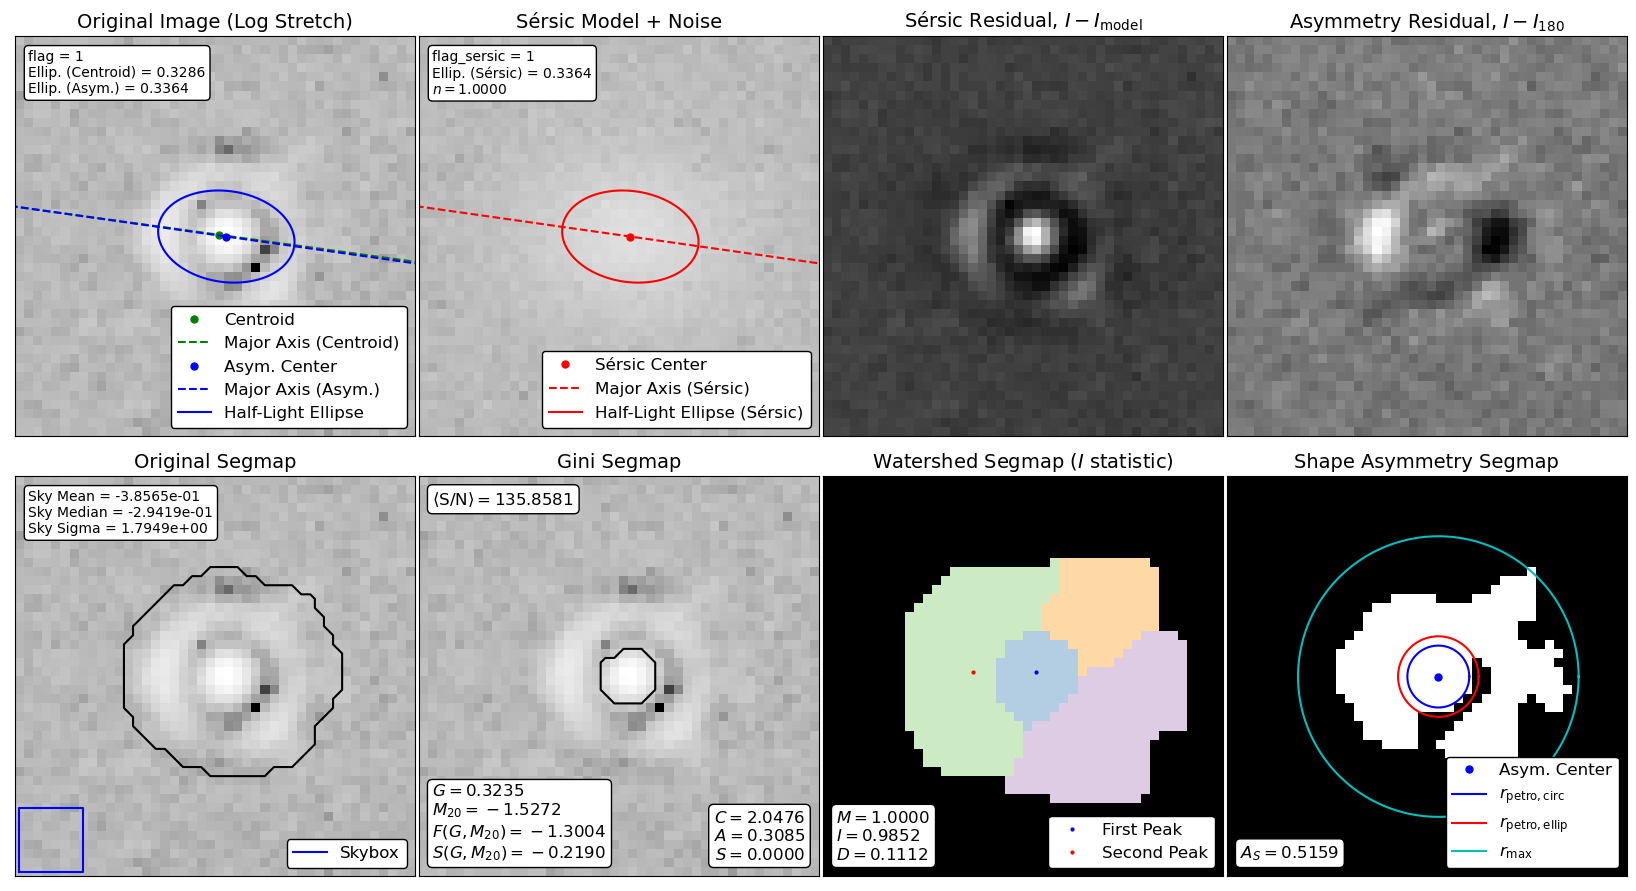

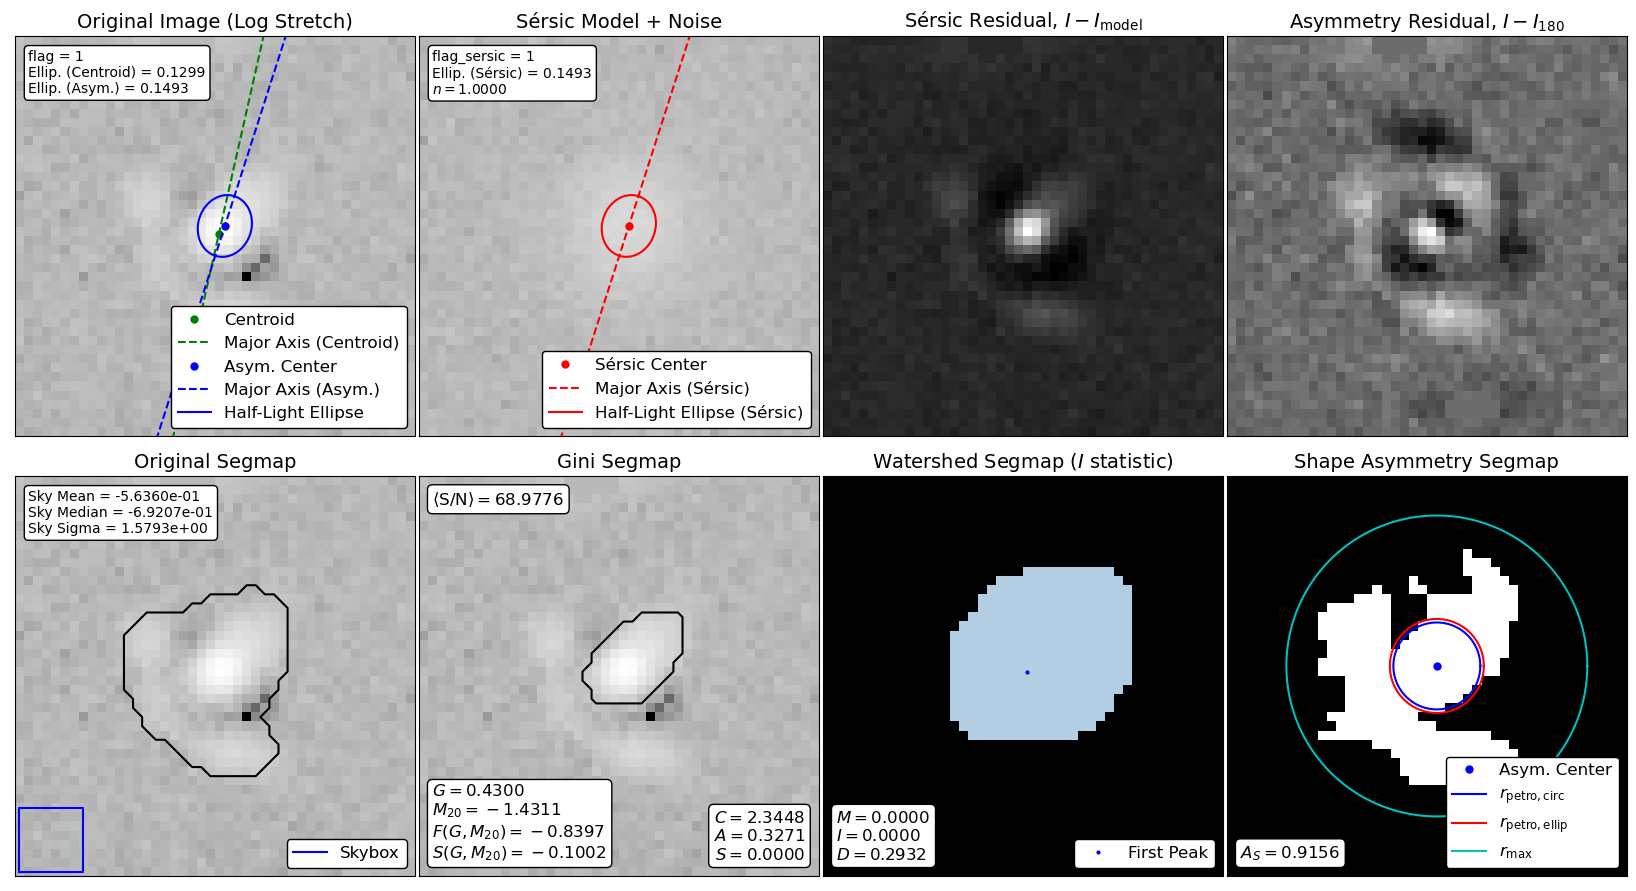

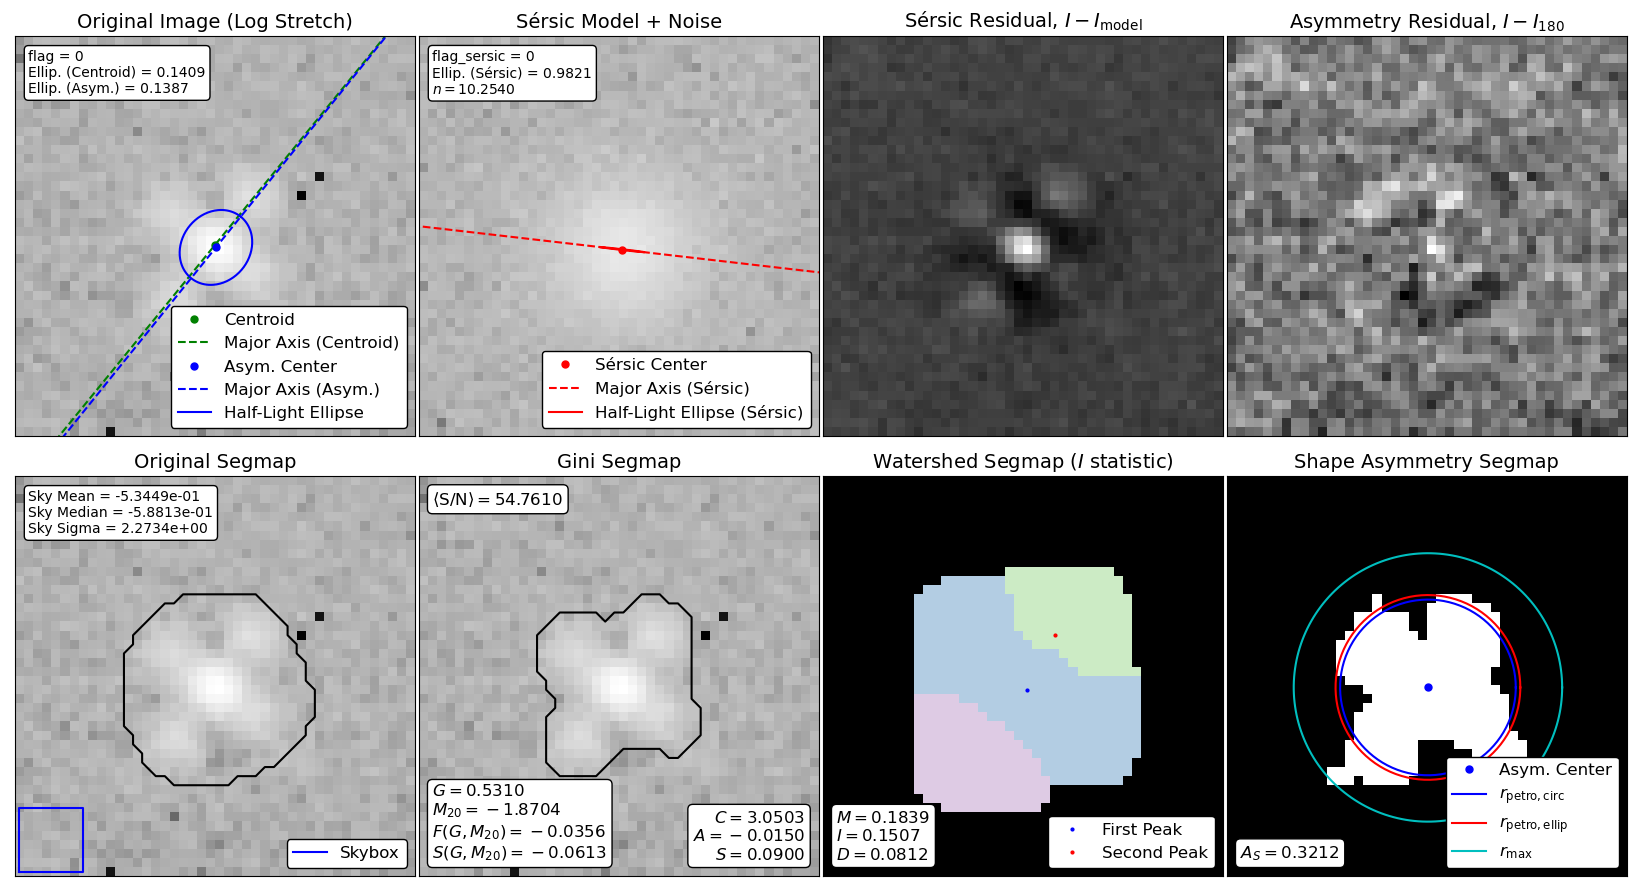

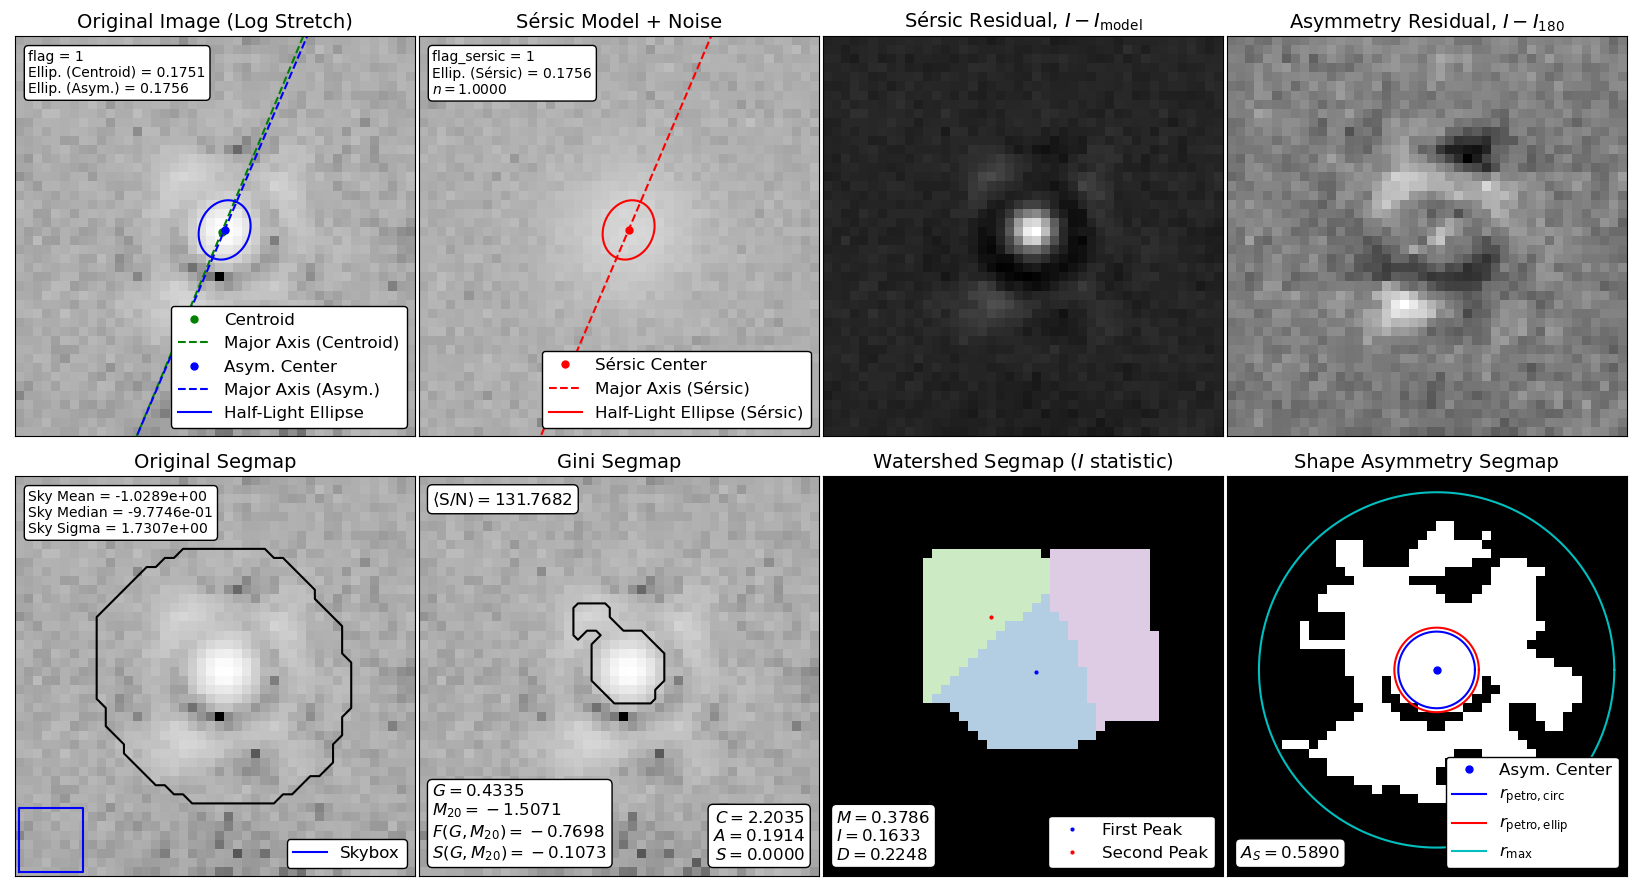

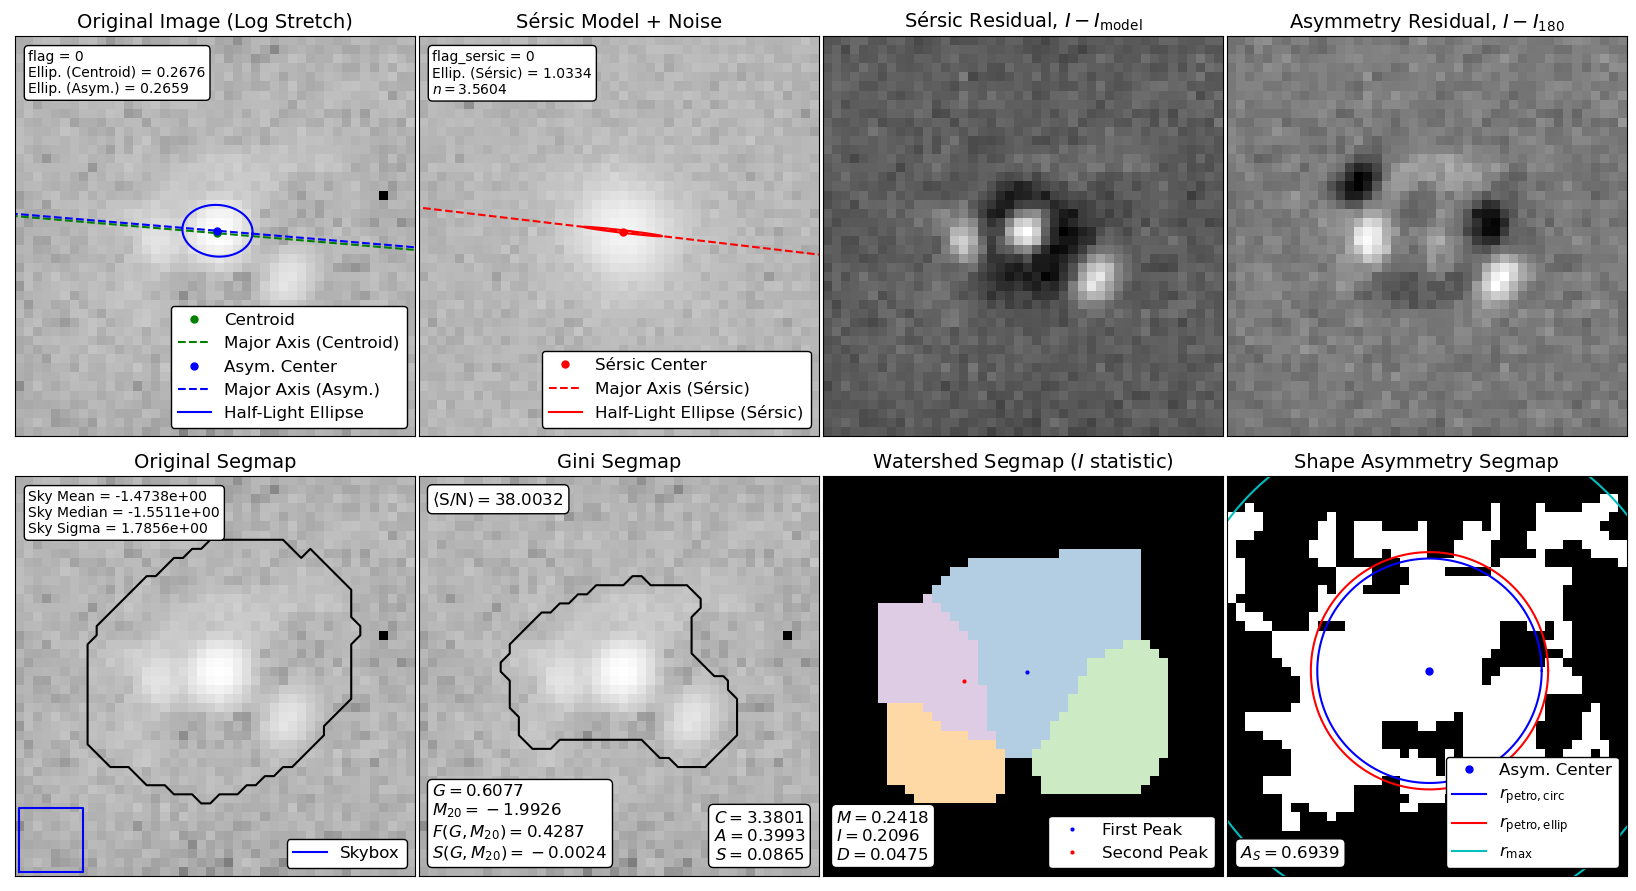

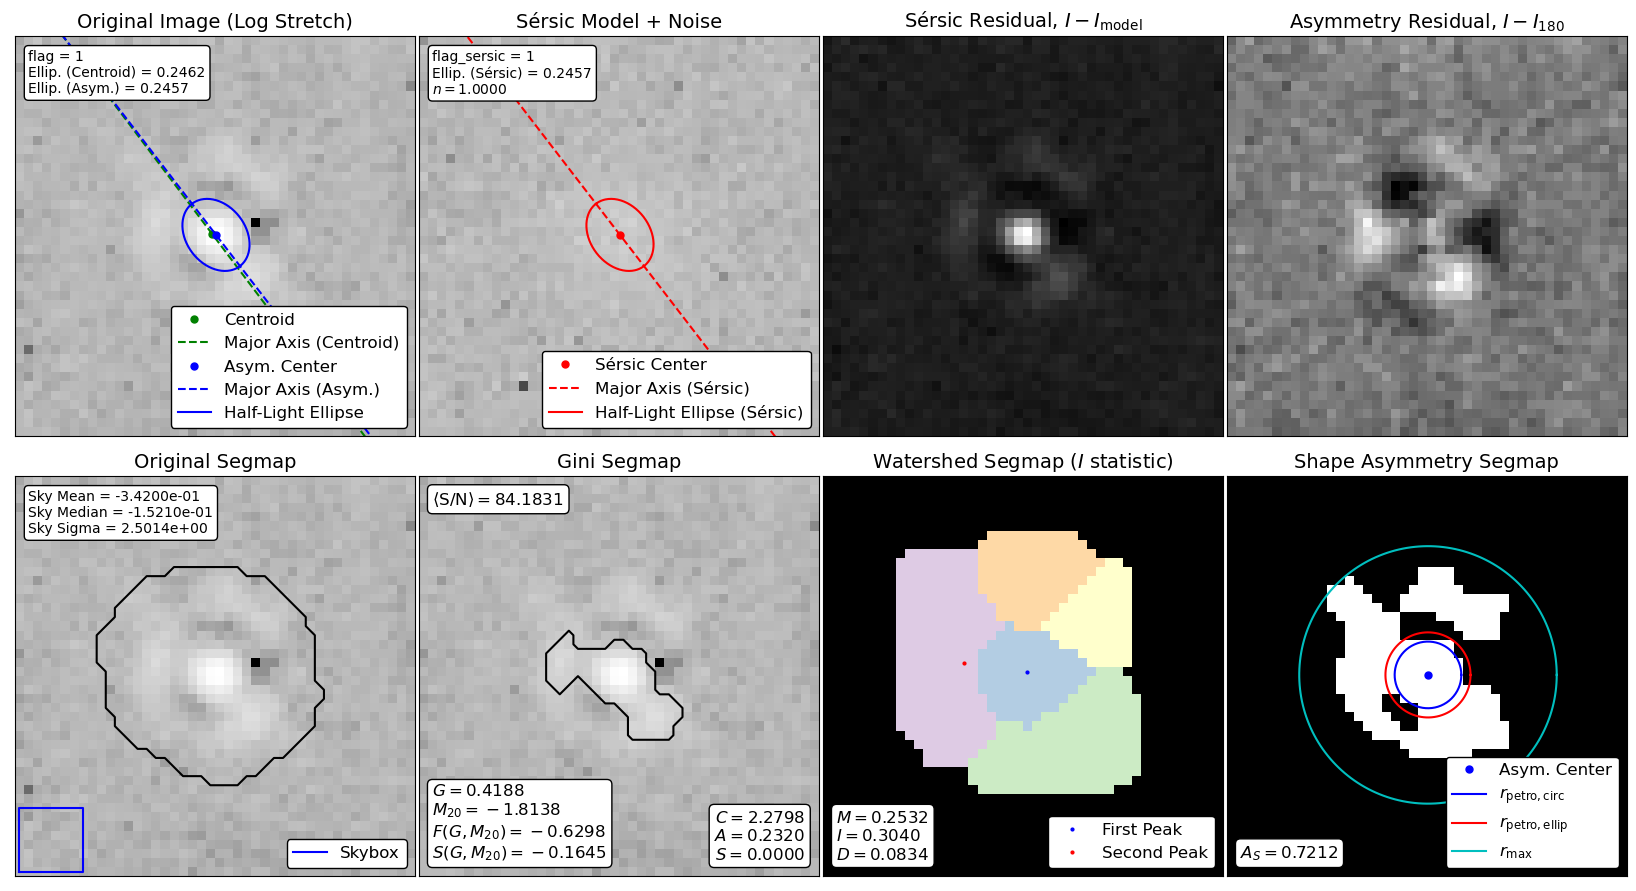

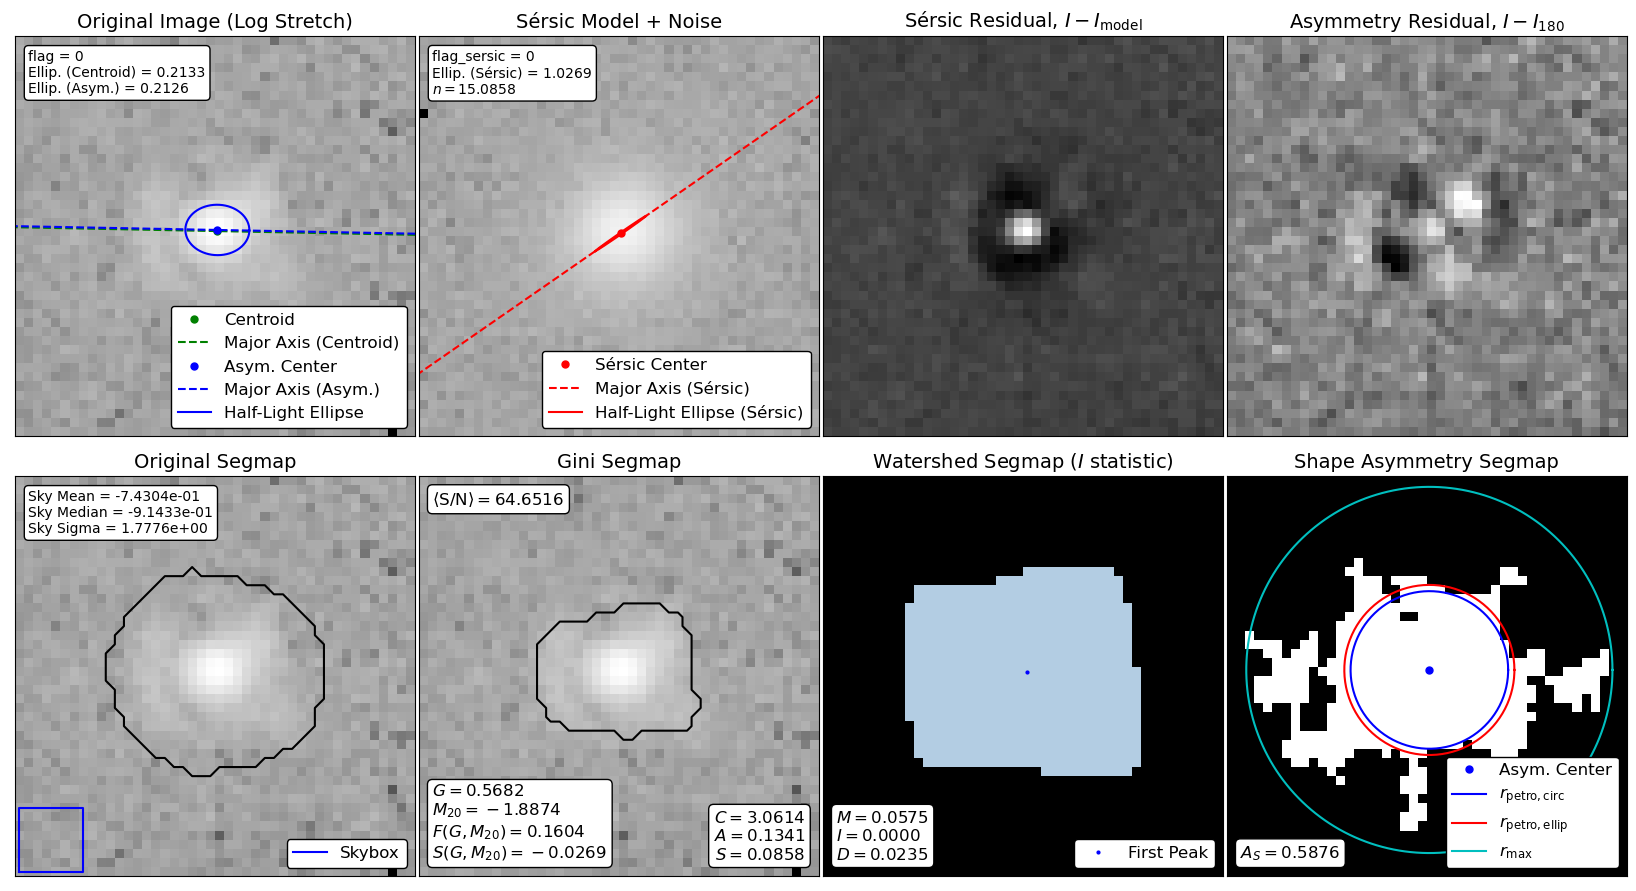

In [26]:
list_segm=[]#we will store segmentation maps

for file in files[:9]:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    td = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    psf_path=path+PSF+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    psf,psf_header=fits.getdata(psf_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    #estimation of the background
    #let's take the median estimator
    
    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    image -= bkg.background  # subtract the background
        
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask,psf=psf)
        morph = source_morphs[0]
        print(file)
        print(f'flag_sersic={morph.flag_sersic}')
        print(f'flag={morph.flag}')
        print('sersic_amplitude =', morph.sersic_amplitude)
        print('sersic_rhalf =', morph.sersic_rhalf)
        print('sersic_n =', morph.sersic_n)
        print('sersic_xc =', morph.sersic_xc)
        print('sersic_yc =', morph.sersic_yc)
        print('sersic_ellip =', morph.sersic_ellip)
        print('sersic_theta =', morph.sersic_theta,'\n')
        fig = make_figure(morph)
    except:
        print('bug')

### Same thing for deflectors only

57037.fits
flag_sersic=0
flag=0
sersic_amplitude = 158.30274674094377
sersic_rhalf = 1.1741409463553403
sersic_n = 2.214722438498747
sersic_xc = 22.993485835773388
sersic_yc = 20.991542767254458
sersic_ellip = 0.8001109033490482
sersic_theta = 0.914934837134825 

52289.fits
flag_sersic=0
flag=0
sersic_amplitude = 66.0364300492048
sersic_rhalf = 1.8869541294813024
sersic_n = 3.4491548083398005
sersic_xc = 21.960991391654247
sersic_yc = 21.967151927000724
sersic_ellip = 0.948374165079181
sersic_theta = 0.6930255261015978 

42292.fits
flag_sersic=0
flag=0
sersic_amplitude = 113.76163227867329
sersic_rhalf = 1.7118959990308378
sersic_n = 2.7855556020110703
sersic_xc = 21.001102848412312
sersic_yc = 20.977006082645453
sersic_ellip = 0.8648245018633886
sersic_theta = 1.6738892070863505 

138916.fits
flag_sersic=0
flag=0
sersic_amplitude = 108.47776325923806
sersic_rhalf = 0.8494603027772393
sersic_n = 5.773628794235886
sersic_xc = 22.976518986449282
sersic_yc = 21.947767221336832
sersic_elli

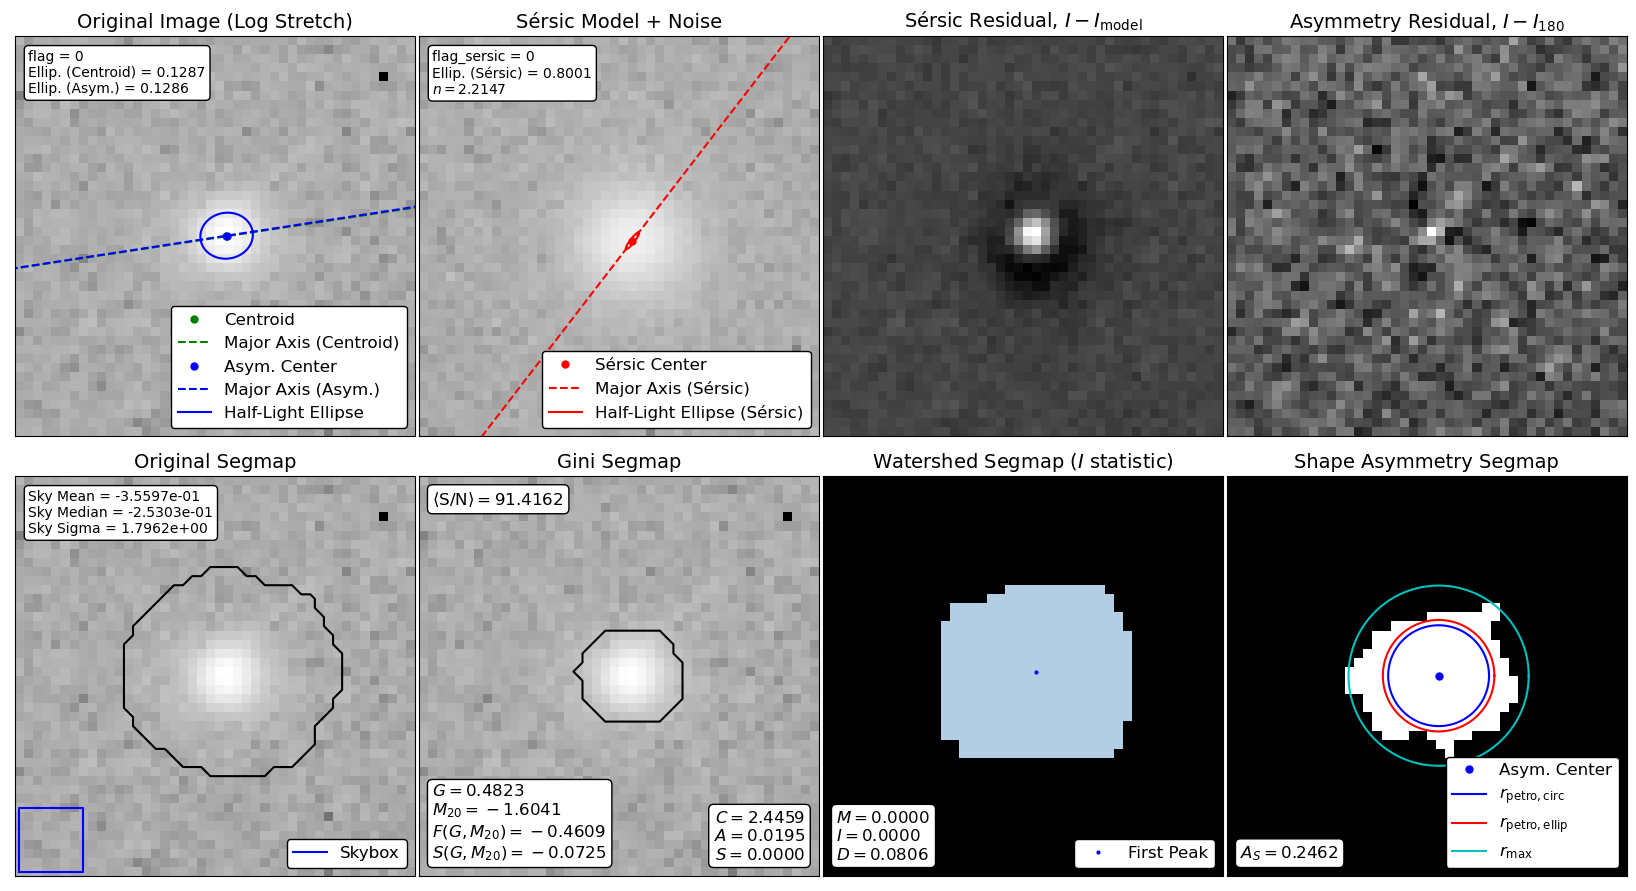

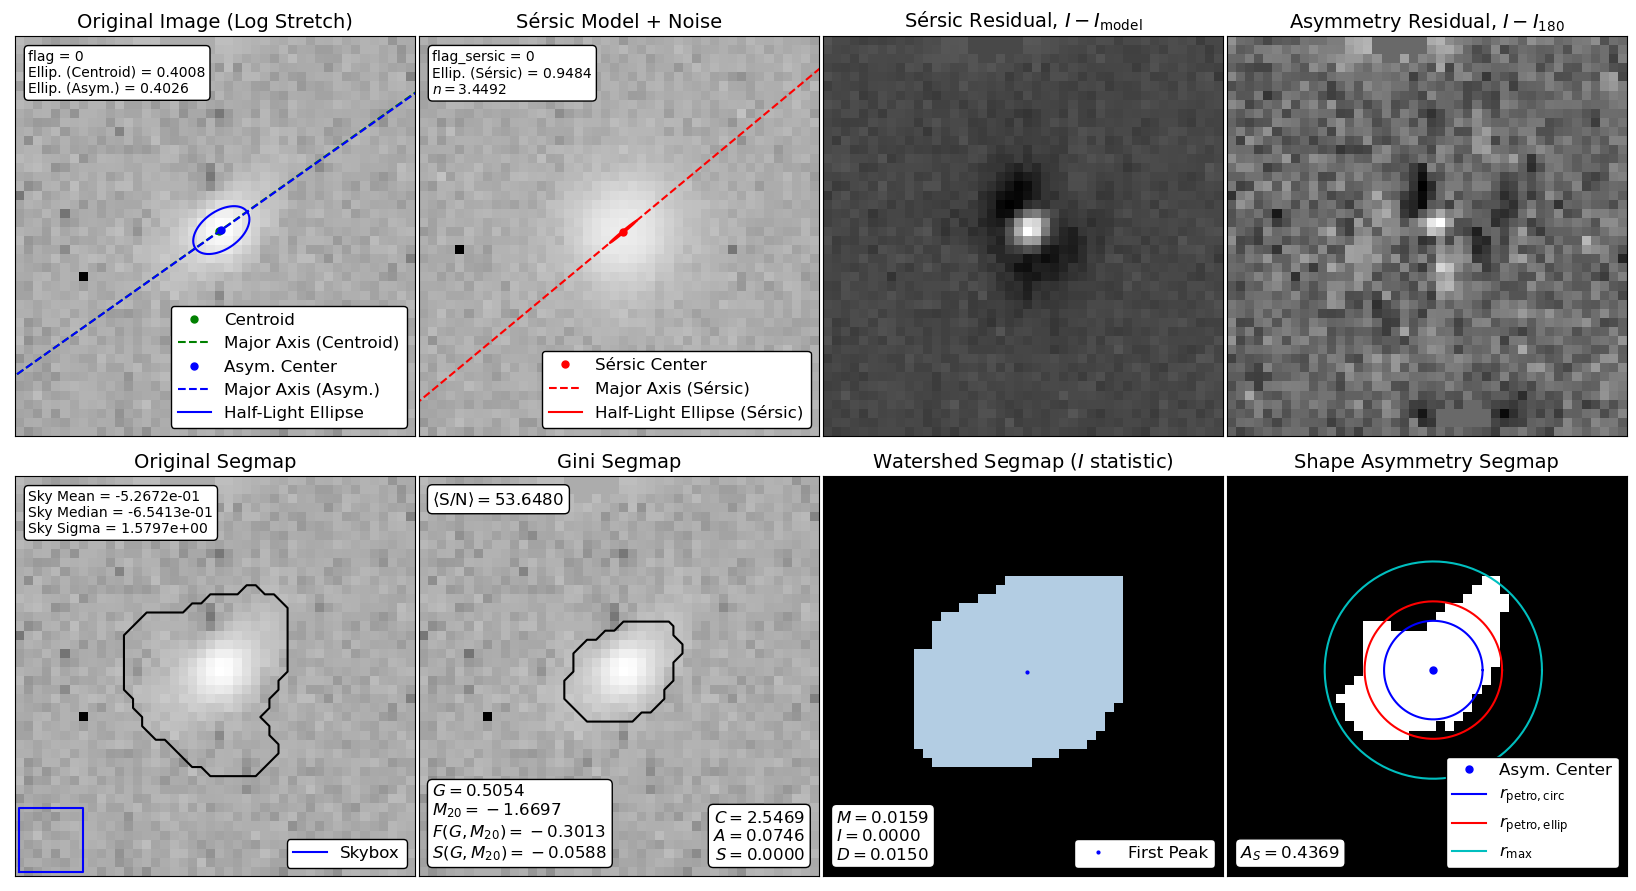

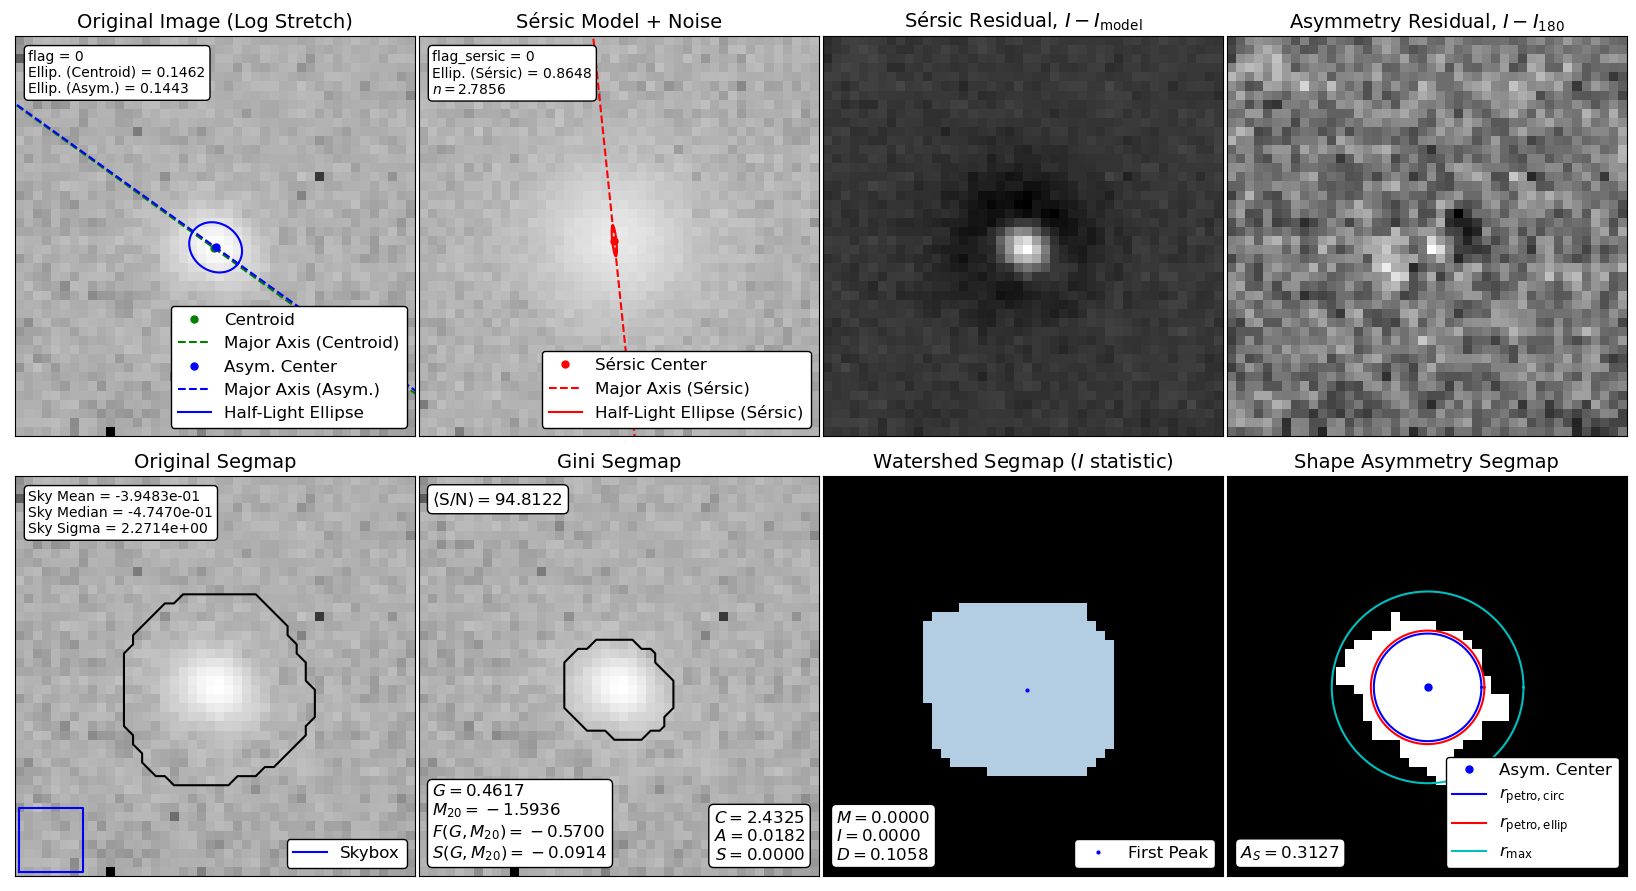

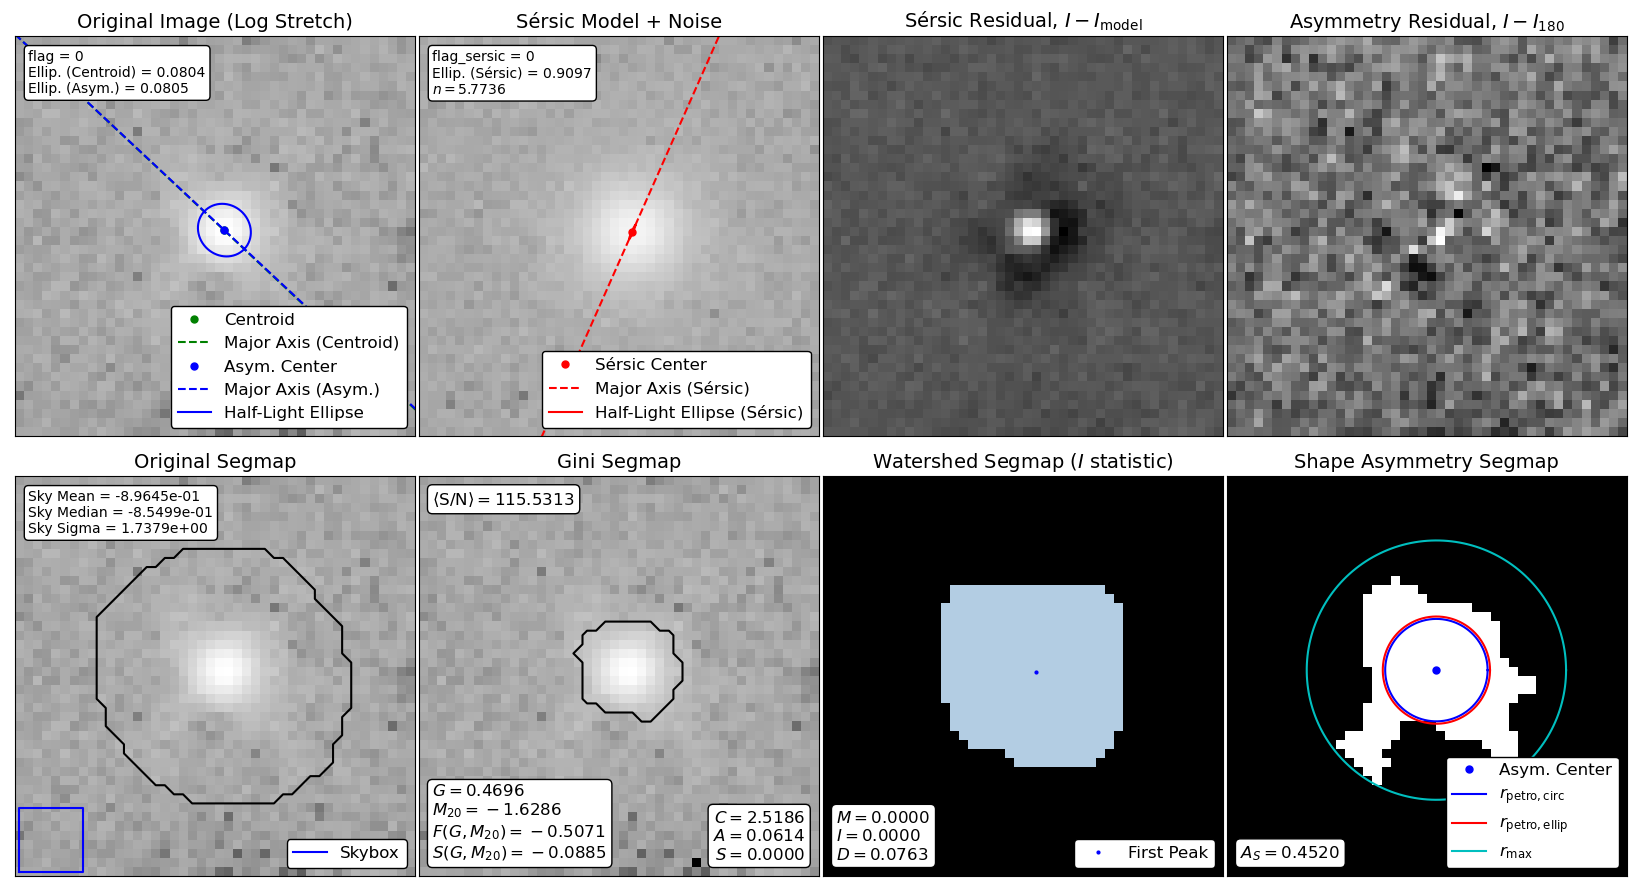

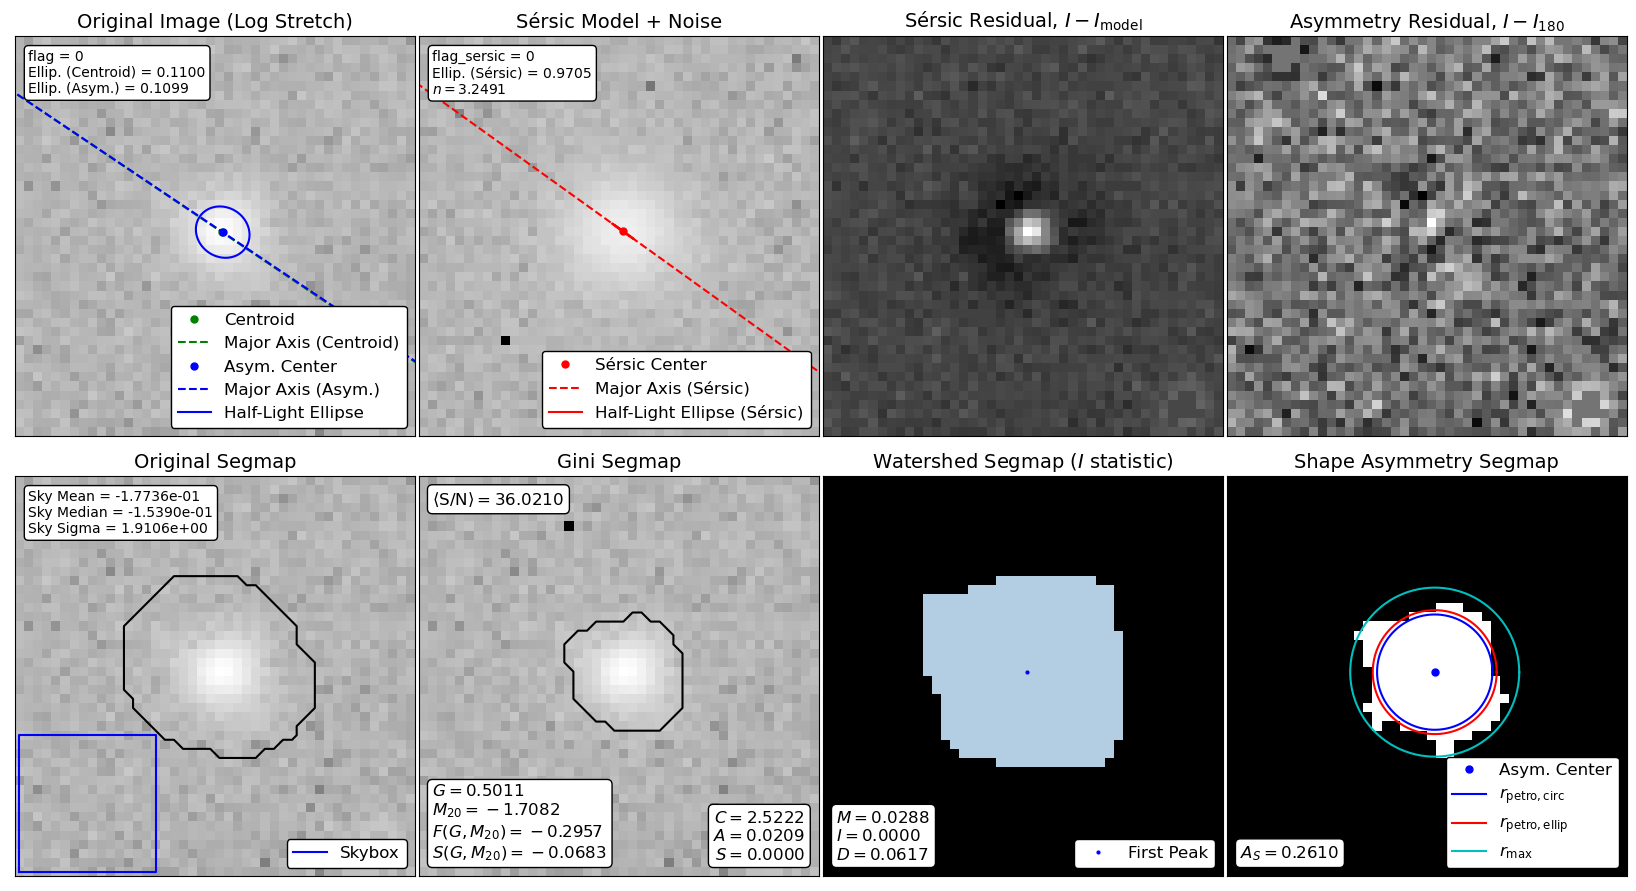

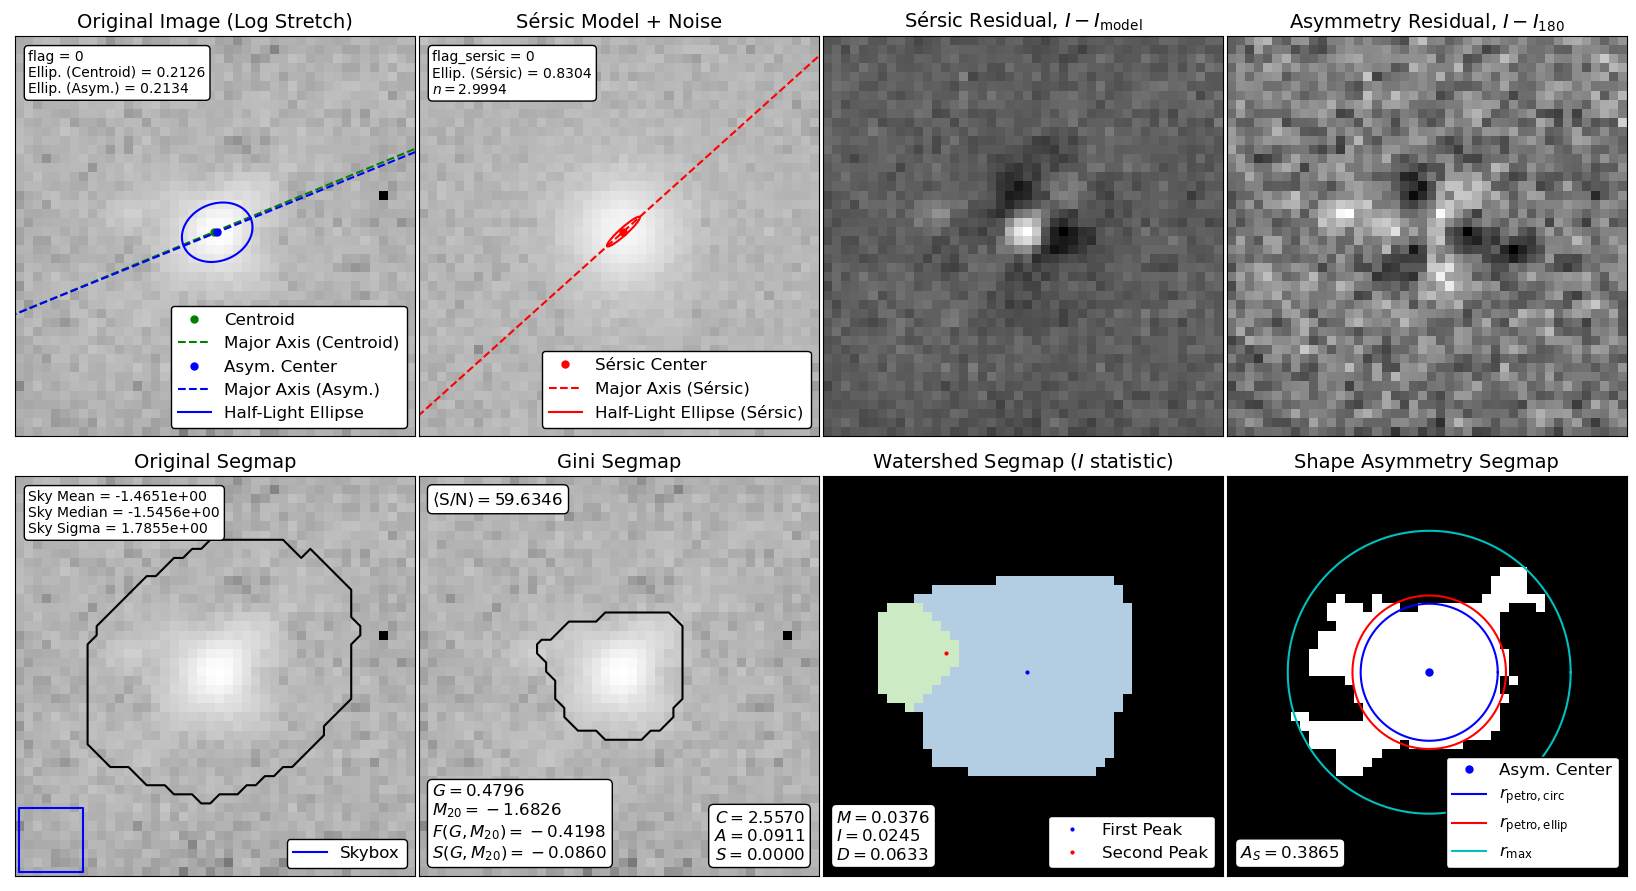

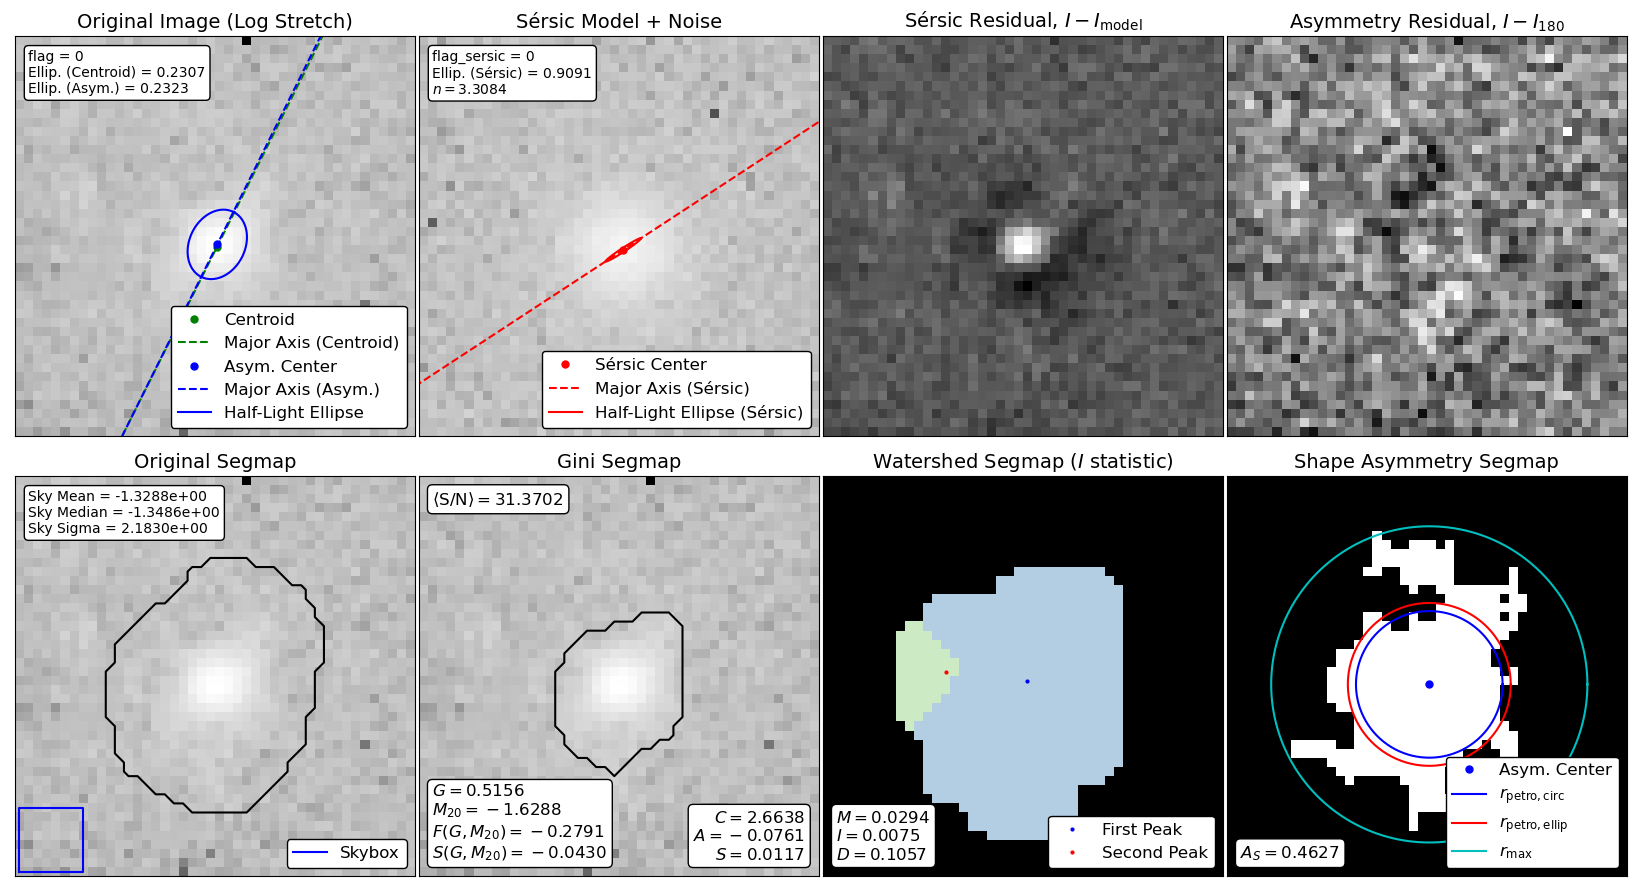

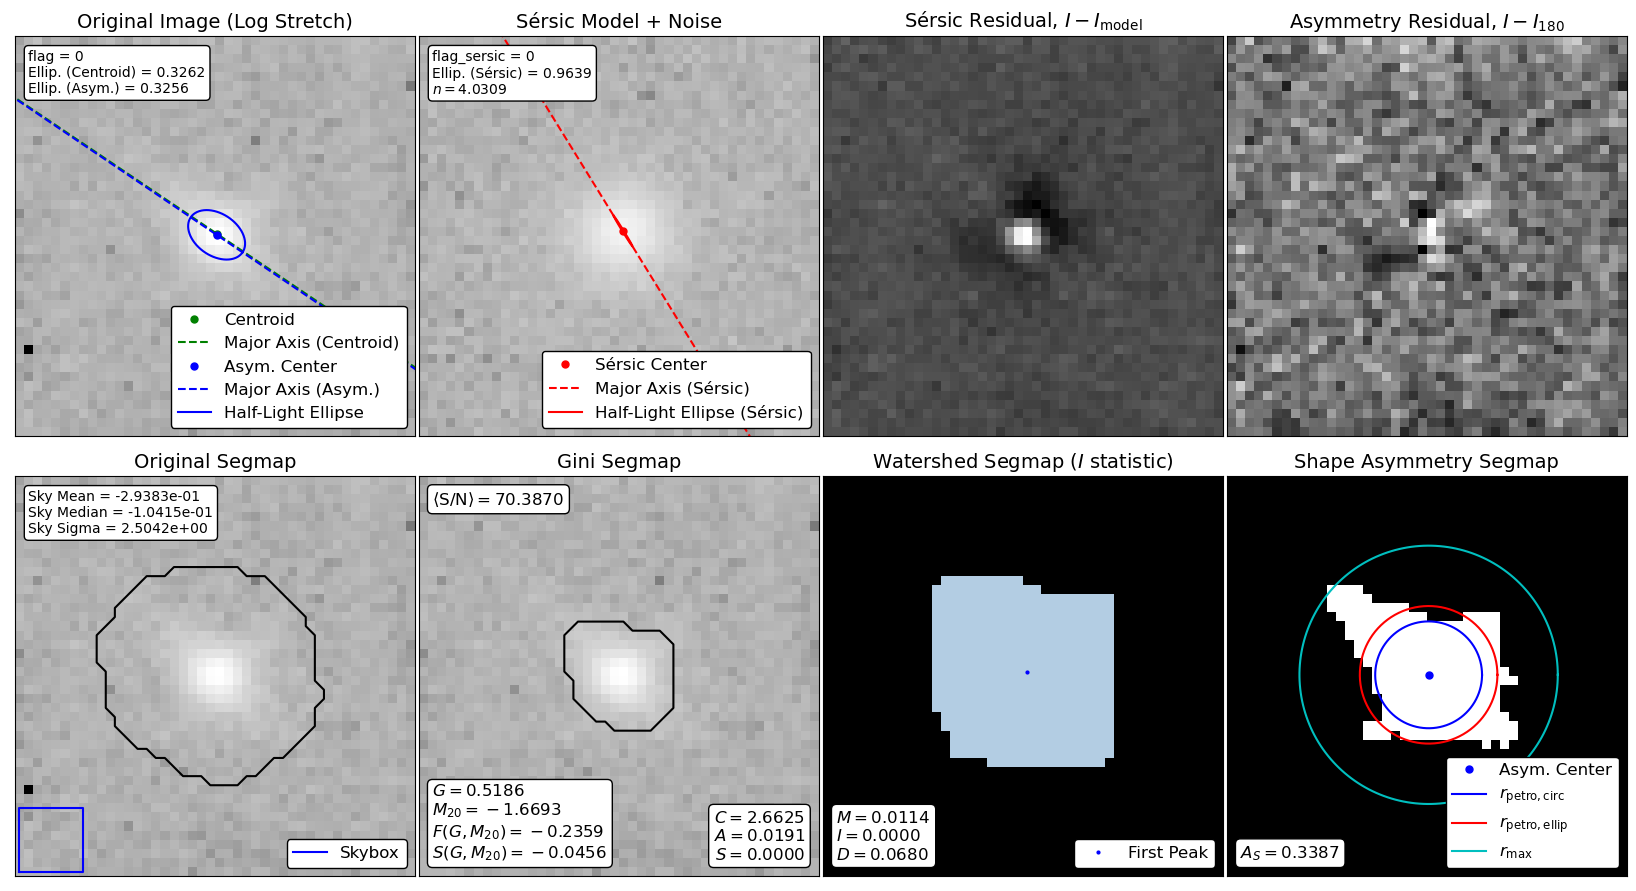

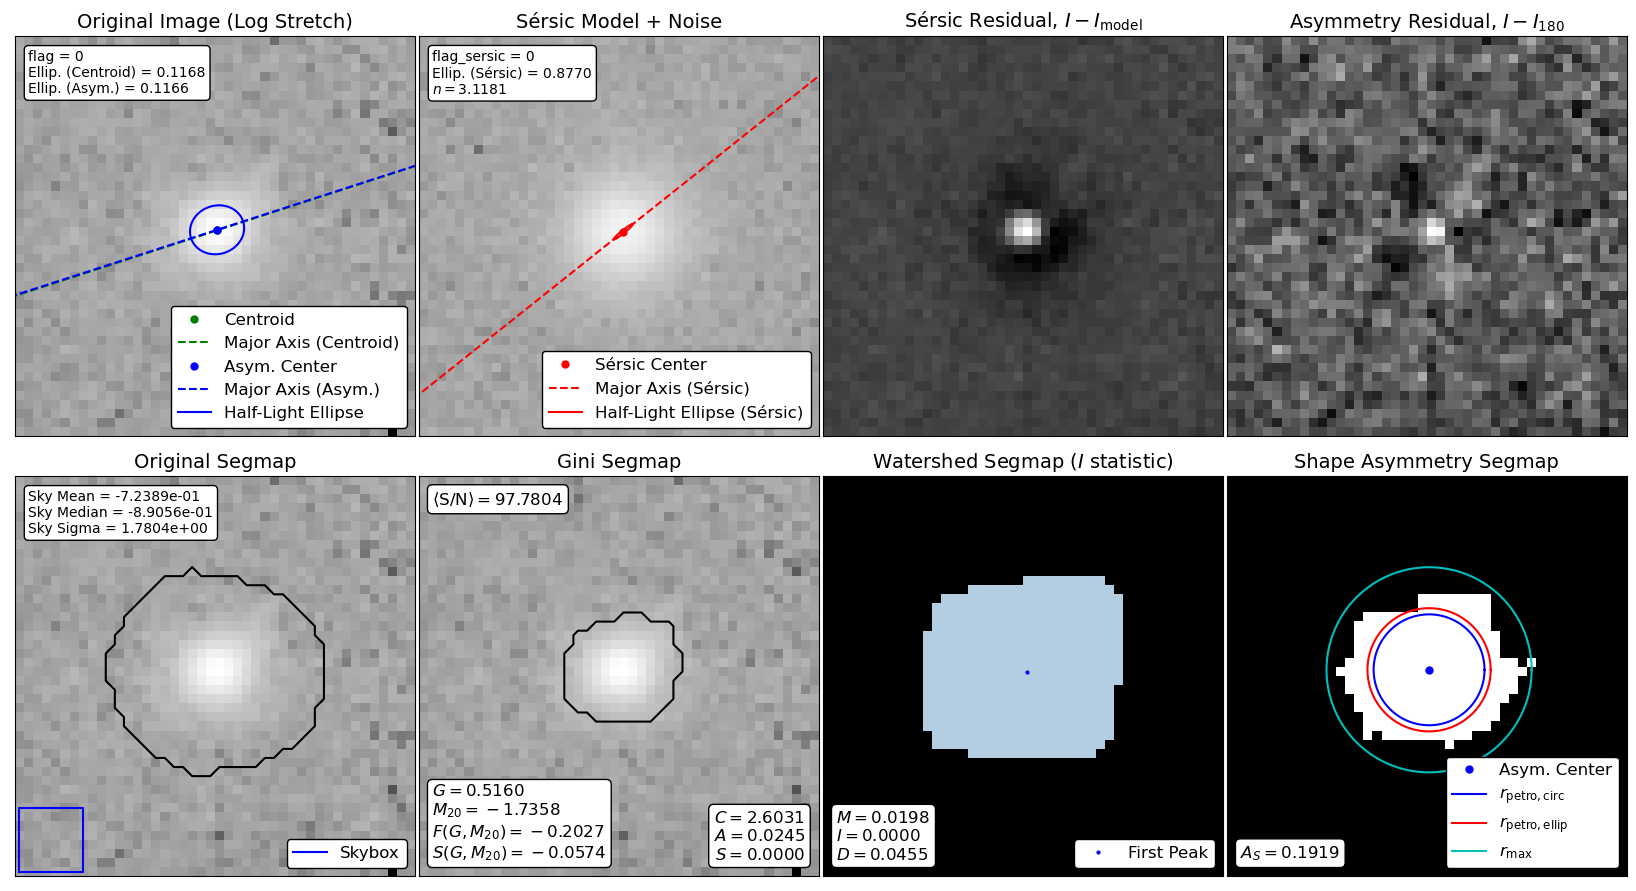

In [27]:
for i,file in zip(range(9),files[:9]):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    psf_path=path+PSF+file
    image, header = fits.getdata(file_path, header=True)
    psf,psf_header= fits.getdata(psf_path,header=True)
    
    segm = list_segm[i]
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    
    
    
    #weight map
    rms_path=path+RMS+file
    rms, rms_header= fits.getdata(rms_path, header=True)
    weight_map=1/rms
    
    #estimation of the background
    #let's take the median estimator
    
    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    image -= bkg.background  # subtract the background
    
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask, psf=psf)
        morph = source_morphs[0]
        print(file)
        print(f'flag_sersic={morph.flag_sersic}')
        print(f'flag={morph.flag}')
        print('sersic_amplitude =', morph.sersic_amplitude)
        print('sersic_rhalf =', morph.sersic_rhalf)
        print('sersic_n =', morph.sersic_n)
        print('sersic_xc =', morph.sersic_xc)
        print('sersic_yc =', morph.sersic_yc)
        print('sersic_ellip =', morph.sersic_ellip)
        print('sersic_theta =', morph.sersic_theta,'\n')
        fig = make_figure(morph)
    except:
        print(bug)

## Let's compare the sersic half radius & sersic ellipticity between lensed and non lensed

In [29]:
subsample_files=np.random.choice(files,300, replace=False)

In [ ]:
list_segm=[]

rhalf_lensed=[]
rhalf_non_lensed=[]
ellip_lensed=[]
ellip_non_lensed=[]
n_lensed=[]
n_non_lensed=[]

for file in subsample_files:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    td = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    psf_path=path+PSF+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    psf,psf_header=fits.getdata(psf_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    #estimation of the background
    #let's take the median estimator
    
    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    image -= bkg.background  # subtract the background
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask, psf=psf)
        morph = source_morphs[0]
        if morph.flag_sersic==0:
            rhalf_lensed.append(morph.sersic_rhalf)
            ellip_lensed.append(morph.sersic_ellip)
            n_lensed.append(morph.sersic_n)
        else:
            pass
    except:
        print('bug')
    

for i,file in zip(range(len(subsample_files)),subsample_files):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    psf_path=path+PSF+file
    image, header = fits.getdata(file_path, header=True)
    psf,psf_header= fits.getdata(psf_path,header=True)
    
    segm = list_segm[i]
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    
    
    
    #weight map
    rms_path=path+RMS+file
    rms, rms_header= fits.getdata(rms_path, header=True)
    weight_map=1/rms
    
    #estimation of the background
    #let's take the median estimator
    
    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    image -= bkg.background  # subtract the background
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask, psf=psf)
        morph = source_morphs[0]
        if morph.flag_sersic==0:
            rhalf_non_lensed.append(morph.sersic_rhalf)
            ellip_non_lensed.append(morph.sersic_ellip)
            n_non_lensed.append(morph.sersic_n)
        else:
            pass
    except:
        print('bug')

In [30]:
list_segm=[]

rhalf_lensed=[]
rhalf_non_lensed=[]
ellip_lensed=[]
ellip_non_lensed=[]
n_lensed=[]
n_non_lensed=[]

for file in subsample_files:#No replacement to avoid the displaying of a same picture
    file_path=path+lensed+file
    image, header = fits.getdata(file_path, header=True)
    
    td = mad_std(image)
    threshold=2.5*std
    segm = detect_sources(image, threshold, npixels=5)
    
    list_segm.append(segm)
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    # construction de la rms
    source_path=path+lensed_source+file
    rms_path=path+RMS+file
    lrg_path=path+non_lensed+file
    psf_path=path+PSF+file
    
    source,source_header=fits.getdata(source_path, header=True)
    rms,rms_header=fits.getdata(rms_path,header=True)
    lrg,lrg_header=fits.getdata(lrg_path,header=True)
    psf,psf_header=fits.getdata(psf_path,header=True)
    
    gain=lrg_header['GAIN']
    source_rms=source/gain
    
    total_rms=rms+source_rms
    
    weight_map=1/total_rms
    
    #estimation of the background
    #let's take the median estimator
    
    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    image -= bkg.background  # subtract the background
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask, psf=psf)
        morph = source_morphs[0]
        if morph.flag_sersic==0:
            rhalf_lensed.append(morph.sersic_rhalf)
            ellip_lensed.append(morph.sersic_ellip)
            n_lensed.append(morph.sersic_n)
        else:
            pass
    except:
        print('bug')
    

for i,file in zip(range(len(subsample_files)),subsample_files):#No replacement to avoid the displaying of a same picture
    file_path=path+non_lensed+file
    psf_path=path+PSF+file
    image, header = fits.getdata(file_path, header=True)
    psf,psf_header= fits.getdata(psf_path,header=True)
    
    segm = list_segm[i]
    
    Mask=mask(segm)
    segm_map=galaxy_map(segm)
        
    segmap_float = ndi.uniform_filter(np.float64(segm_map.data), size=5)
    segm_map =1*(segmap_float > 0.5)
    
    
    
    
    #weight map
    rms_path=path+RMS+file
    rms, rms_header= fits.getdata(rms_path, header=True)
    weight_map=1/rms
    
    #estimation of the background
    #let's take the median estimator
    
    bkg_estimator = MedianBackground()

    bkg = Background2D(image, (4, 4), filter_size=(3, 3),bkg_estimator=bkg_estimator, mask=segm.data)
    
    image -= bkg.background  # subtract the background
    try:
        source_morphs = statmorph.source_morphology(image, segm_map, weightmap=weight_map, mask=Mask, psf=psf)
        morph = source_morphs[0]
        if morph.flag_sersic==0:
            rhalf_non_lensed.append(morph.sersic_rhalf)
            ellip_non_lensed.append(morph.sersic_ellip)
            n_non_lensed.append(morph.sersic_n)
        else:
            pass
    except:
        print('bug')

bug


bug


bug


bug
bug


bug


bug


bug


bug


bug


bug


bug


bug


bug


bug
bug


bug


bug


bug


bug


bug


bug


bug


bug


bug
bug


bug


bug


bug


bug


bug


bug
bug


bug


bug


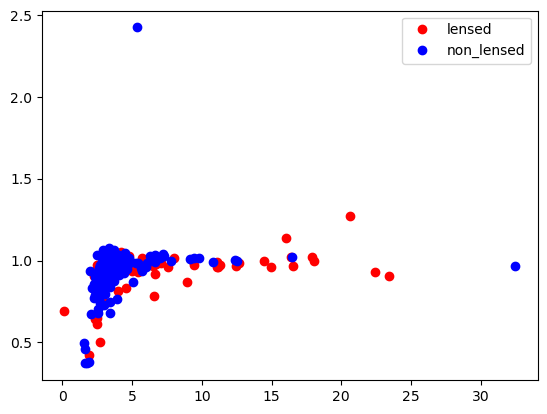

In [31]:
plt.plot(n_lensed,ellip_lensed,'ro',label='lensed')
plt.plot(n_non_lensed,ellip_non_lensed,'bo',label="non_lensed")
plt.legend()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(rhalf_lensed, ellip_lensed, n_lensed, 'ro', label="lensed")
ax.plot3D(rhalf_non_lensed, ellip_non_lensed, n_non_lensed, 'bo', label="lensed")
plt.ion()
plt.show()